In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import lxml

In [23]:
file_path= r'C:\Users\TUSHAR GAURAV\Desktop\Air Quality\Solution\Cleaned Data.csv'

In [26]:
data=pd.read_csv(file_path, encoding='latin1')
data.head()

stn_code    sampling_date           state       location   
0     233.0  01 January 2004  Andhra Pradesh  Visakhapatnam  \
1     234.0  01 January 2004  Andhra Pradesh  Visakhapatnam   
2     371.0  01 January 2004  Andhra Pradesh  Visakhapatnam   
3     233.0  02 January 2004  Andhra Pradesh  Visakhapatnam   
4     234.0  02 January 2004  Andhra Pradesh  Visakhapatnam   

                                         agency   
0  Andhra Pradesh State Pollution Control Board  \
1  Andhra Pradesh State Pollution Control Board   
2  Andhra Pradesh State Pollution Control Board   
3  Andhra Pradesh State Pollution Control Board   
4  Andhra Pradesh State Pollution Control Board   

                                 type   so2   no2  rspm    spm   
0                     Industrial Area  13.0  37.0  98.0  141.0  \
1  Residential, Rural and other Areas  12.0  33.0  86.0  126.0   
2  Residential, Rural and other Areas  12.0  33.0  78.0  129.0   
3                     Industrial Area   9.0  33.0  96.0  140.0   
4  Residential, Rural and other Areas   9.0  32.0  79.0  123.0   

                    location_monitoring_station  pm2_5  Unnamed: 12  
0  Industrial Estate, Marripalem, Visakhapatnam    NaN          NaN  
1    Panchayat Raj office, Mindi, Visakhapatnam    NaN          NaN  
2                Police Barracks, Visakhapatnam    NaN          NaN  
3  Industrial Estate, Marripalem, Visakhapatnam    NaN          NaN  
4    Panchayat Raj office, Mindi, Visakhapatnam    NaN          NaN

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141933 entries, 0 to 141932
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     39422 non-null   float64
 1   sampling_date                141933 non-null  object 
 2   state                        141933 non-null  object 
 3   location                     141933 non-null  object 
 4   agency                       39422 non-null   object 
 5   type                         141732 non-null  object 
 6   so2                          141933 non-null  float64
 7   no2                          141933 non-null  float64
 8   rspm                         141933 non-null  float64
 9   spm                          141933 non-null  float64
 10  location_monitoring_station  140823 non-null  object 
 11  pm2_5                        0 non-null       float64
 12  Unnamed: 12                  0 non-null       float64
dtyp

In [31]:
data['so2'].mean(),data['no2'].mean(),data['rspm'].mean(),data['spm'].mean()

(11.241762667362327, 28.30085890810795, 109.66976895752975, 225.21049985364056)

In [32]:
data['so2'].median(),data['no2'].median(),data['rspm'].median(),data['spm'].median()

(8.5, 24.3, 92.0, 192.0)

In [43]:
data=data.iloc[:-30]
print(data.shape)

(141843, 13)


In [51]:
print(data.shape)
data['so2'].value_counts()

(141843, 13)


so2
2.000000      4451
4.000000      3908
5.000000      2992
6.000000      2676
7.000000      2317
              ... 
4.886667         1
3.866667         1
3.290000         1
127.633333       1
21.420000        1
Name: count, Length: 3124, dtype: int64

In [55]:
data['no2'].value_counts()

no2
9.000000     1336
21.000000    1094
13.000000    1092
20.000000    1072
19.000000    1071
             ... 
14.566667       1
9.383333        1
13.616667       1
14.166667       1
52.510000       1
Name: count, Length: 5487, dtype: int64

In [56]:
data['rspm'].value_counts()

rspm
56.00     1070
53.00     1067
54.00     1063
55.00     1040
84.00     1032
          ... 
210.28       1
259.08       1
227.08       1
215.33       1
187.40       1
Name: count, Length: 3932, dtype: int64

In [57]:
data['spm'].value_counts()

spm
0.00      1006
175.00     487
189.00     486
164.00     484
192.00     482
          ... 
240.84       1
210.08       1
167.86       1
327.86       1
90.37        1
Name: count, Length: 6220, dtype: int64

<Axes: xlabel='so2', ylabel='count'>

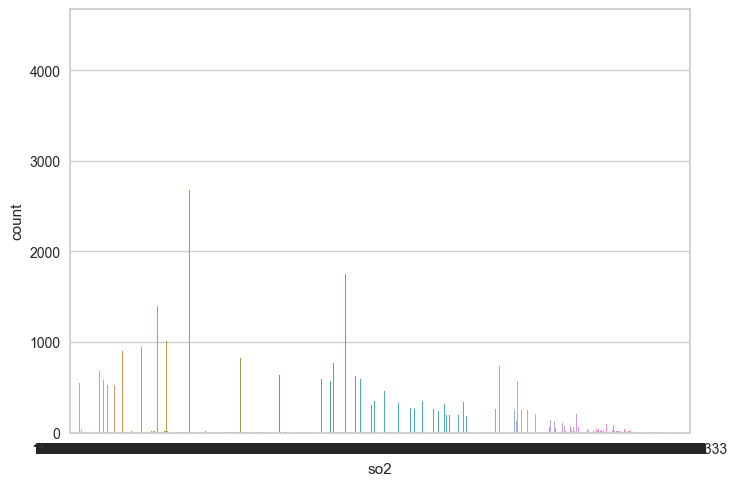

In [58]:
sns.countplot(x='so2' , data = data)

<Axes: xlabel='no2', ylabel='count'>

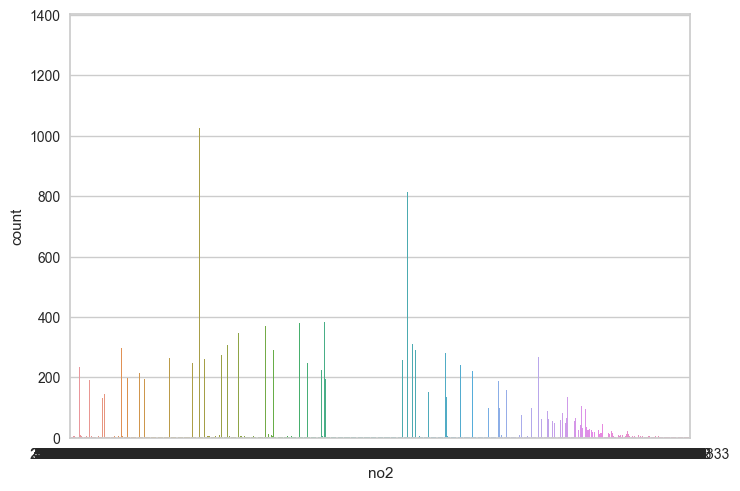

In [59]:
sns.countplot(x='no2' , data = data)

<Axes: xlabel='rspm', ylabel='count'>

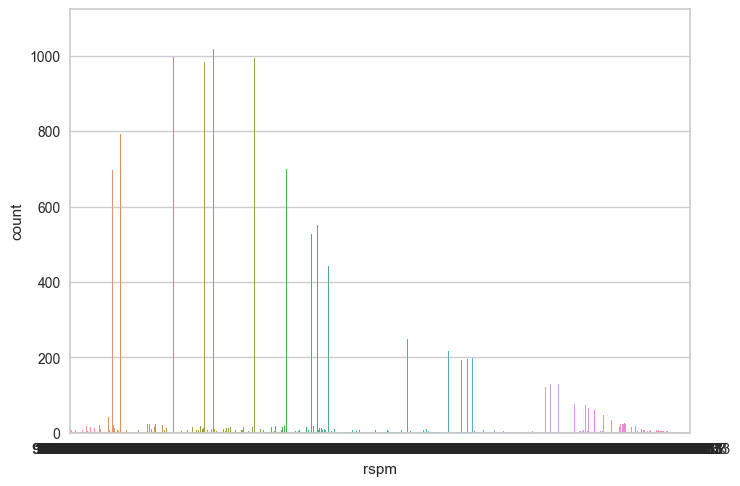

In [60]:
sns.countplot(x='rspm' , data = data)

<Axes: xlabel='spm', ylabel='count'>

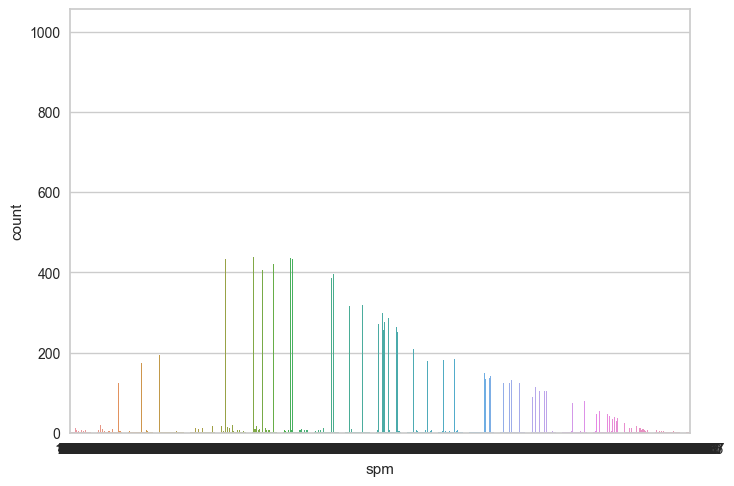

In [61]:
sns.countplot(x='spm' , data = data)

<Axes: xlabel='state', ylabel='so2'>

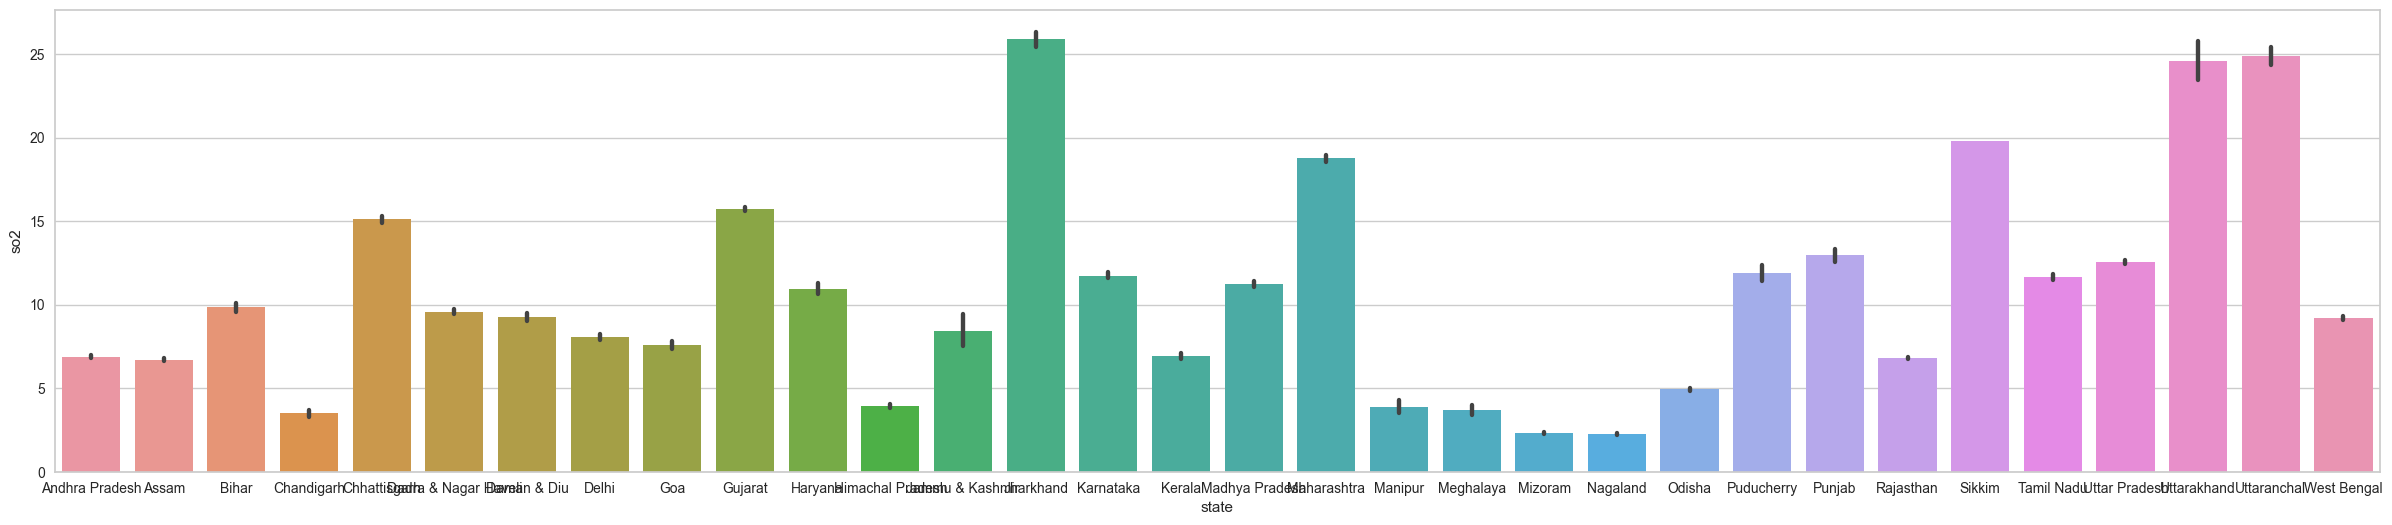

In [64]:
plt.figure(figsize = (30,6))
sns.barplot(x = 'state', y = 'so2', data = data)

<Axes: xlabel='state', ylabel='no2'>

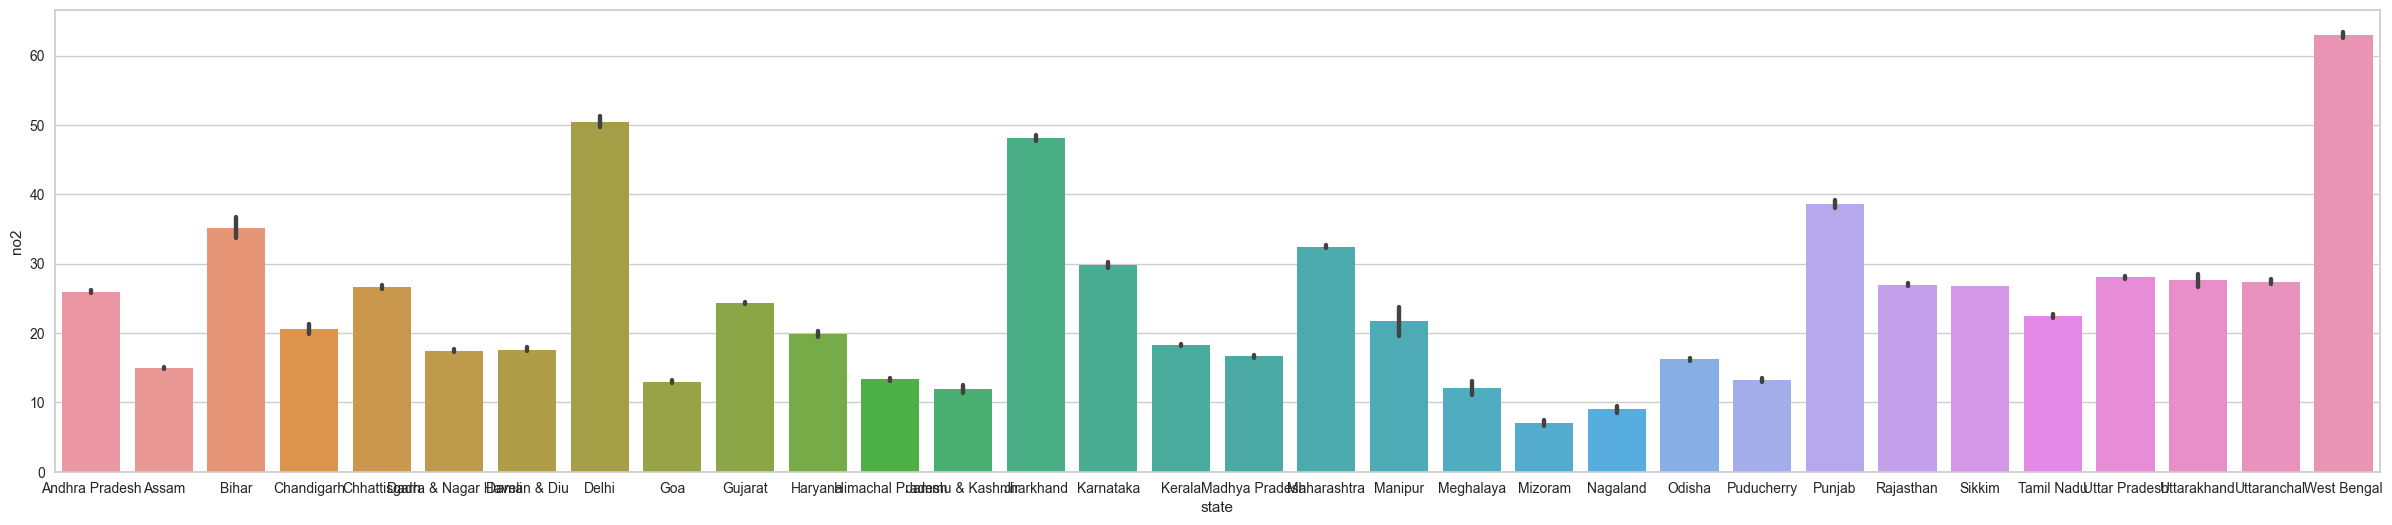

In [65]:
plt.figure(figsize = (30,6))
sns.barplot(x = 'state', y = 'no2', data = data)

<Axes: xlabel='state', ylabel='rspm'>

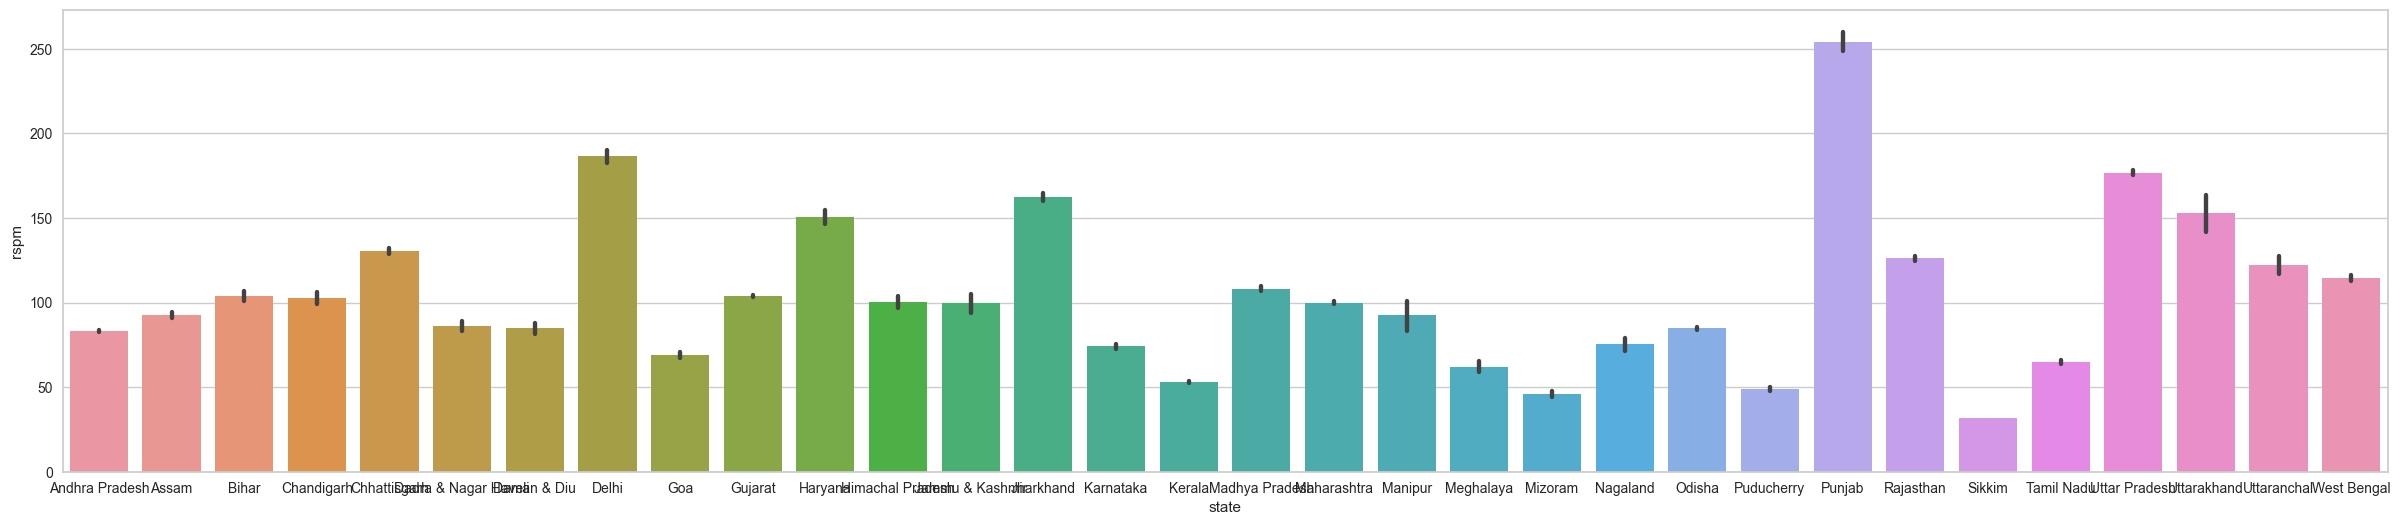

In [66]:
plt.figure(figsize = (30,6))
sns.barplot(x = 'state', y = 'rspm', data = data)

<Axes: xlabel='state', ylabel='spm'>

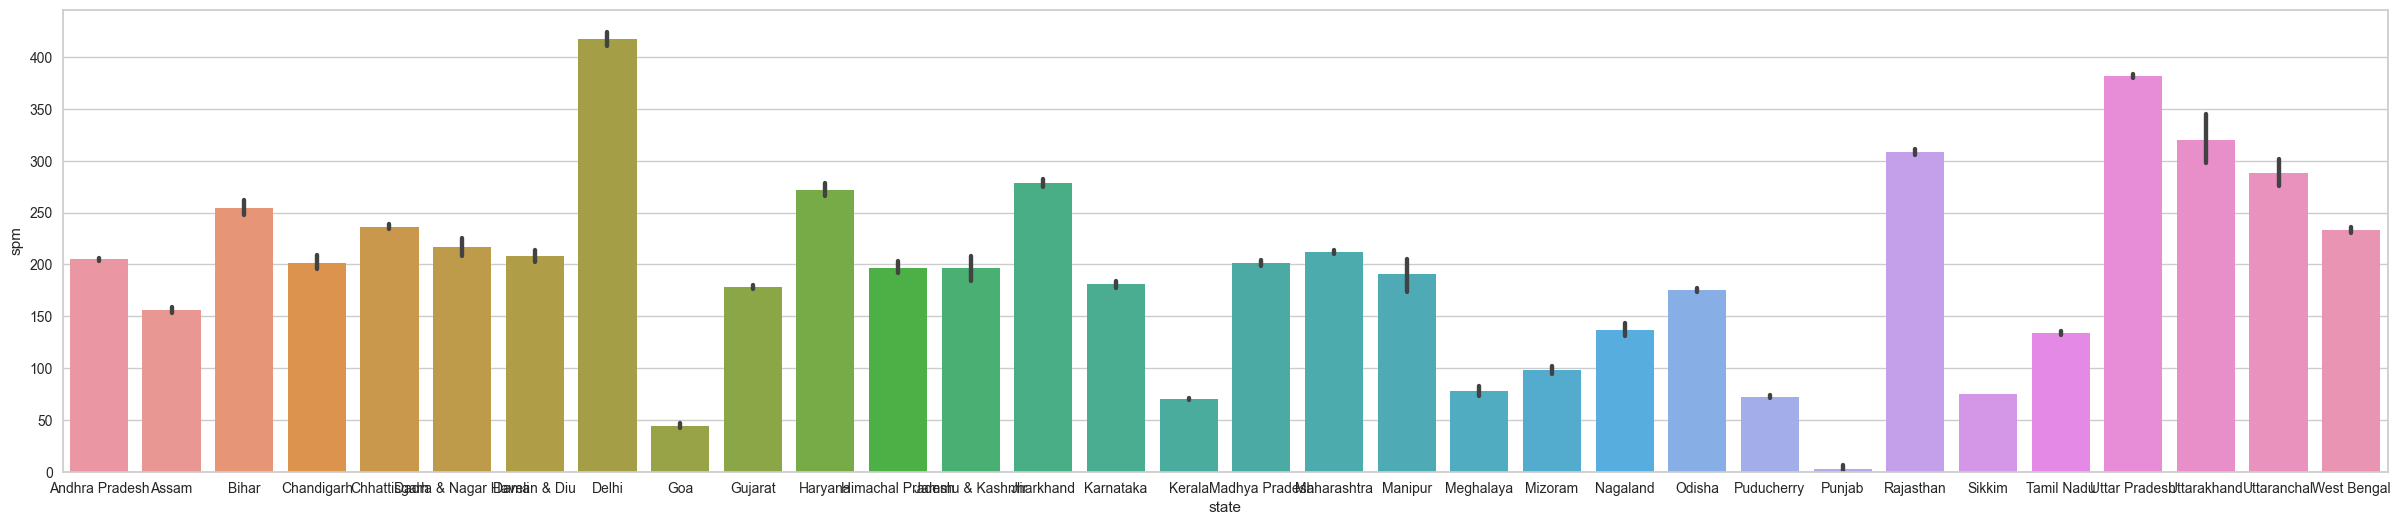

In [67]:
plt.figure(figsize = (30,6))
sns.barplot(x = 'state', y = 'spm', data = data)

<Axes: xlabel='type', ylabel='so2'>

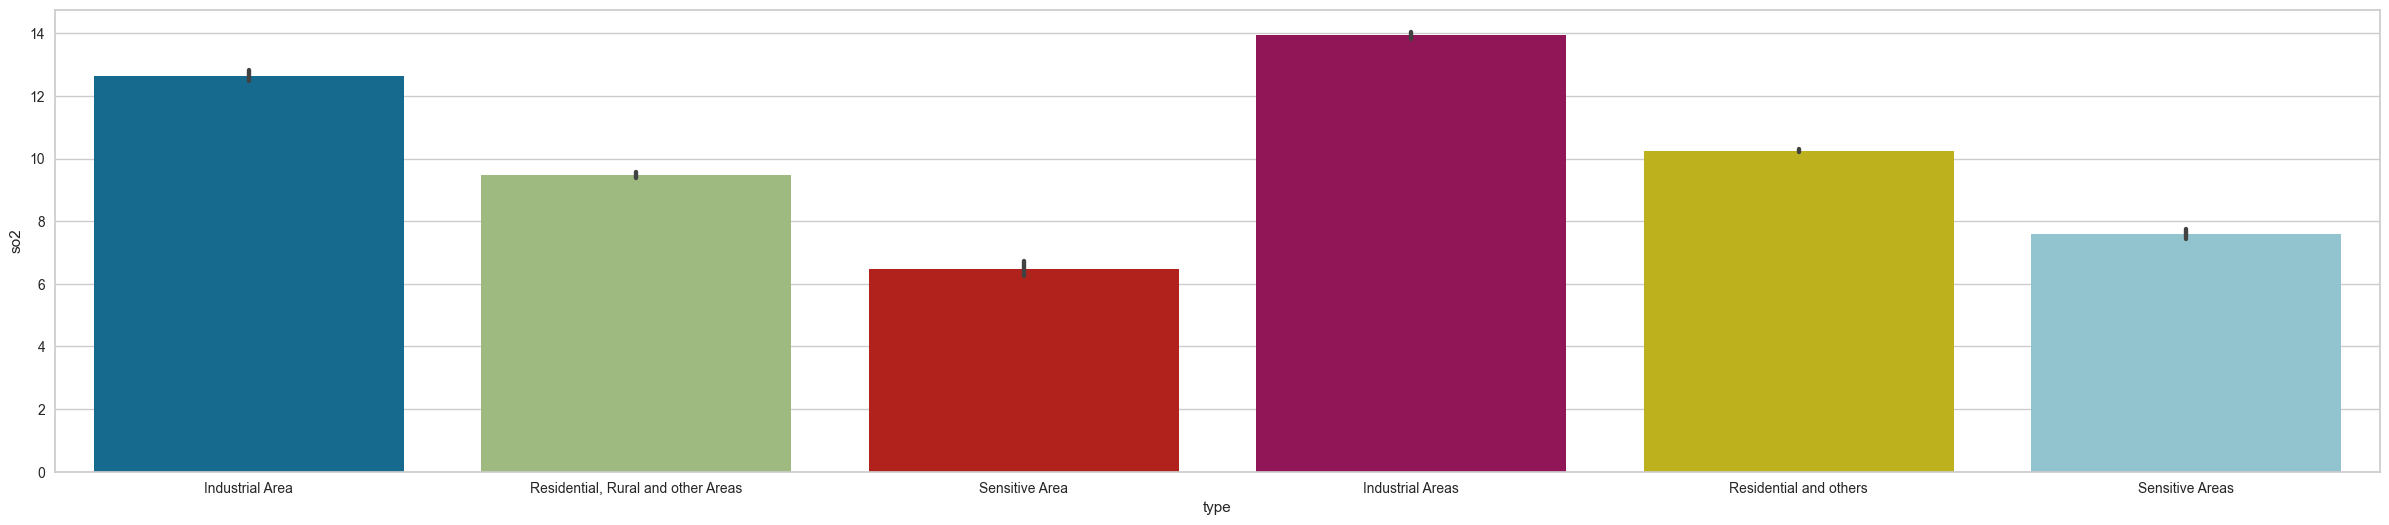

In [68]:
plt.figure(figsize = (30,6))
sns.barplot(x = 'type', y = 'so2', data = data)

<Axes: xlabel='type', ylabel='no2'>

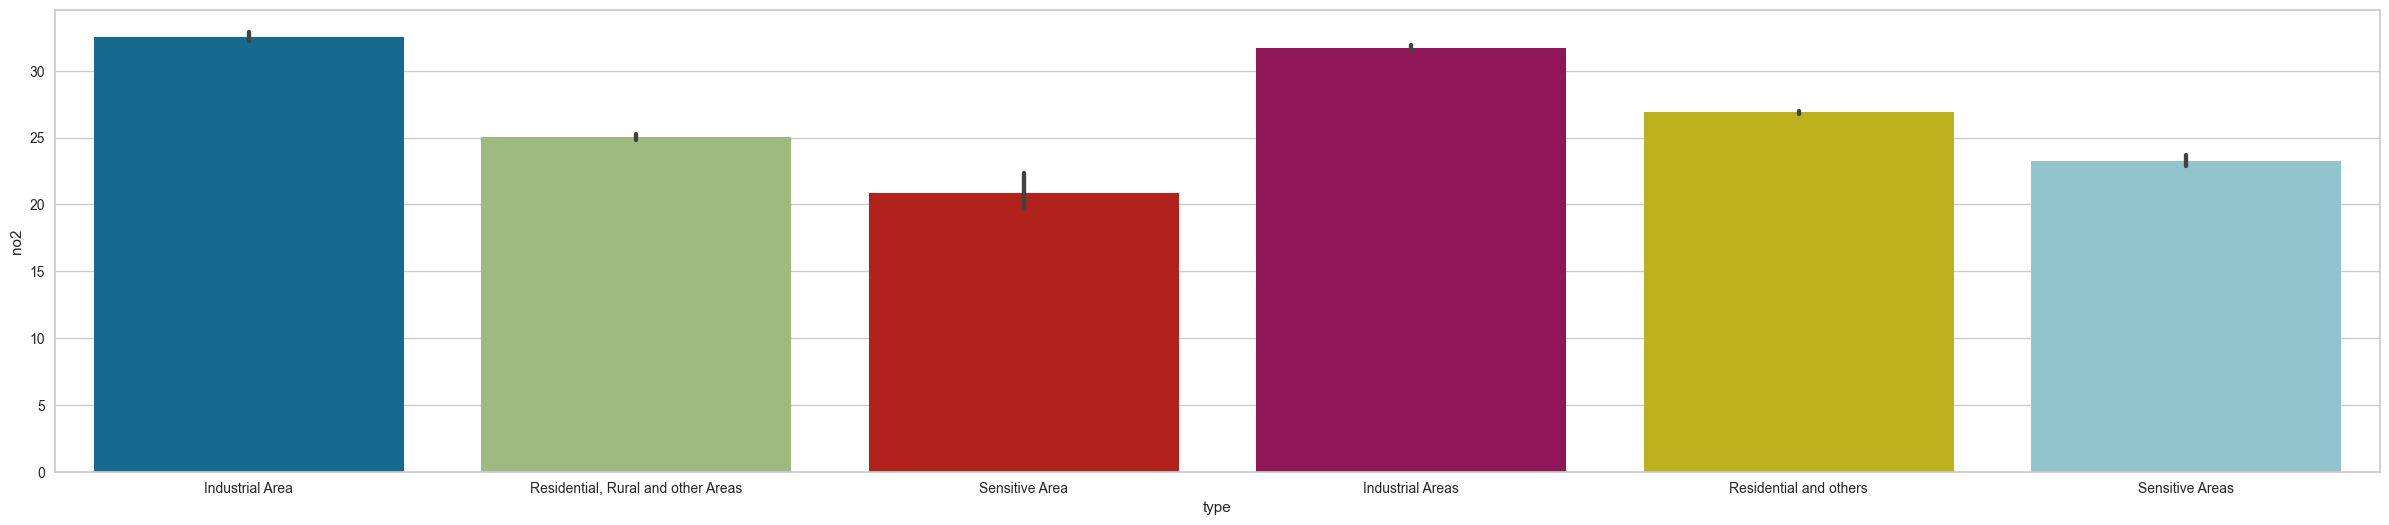

In [69]:
plt.figure(figsize = (30,6))
sns.barplot(x = 'type', y = 'no2', data = data)

<Axes: xlabel='type', ylabel='rspm'>

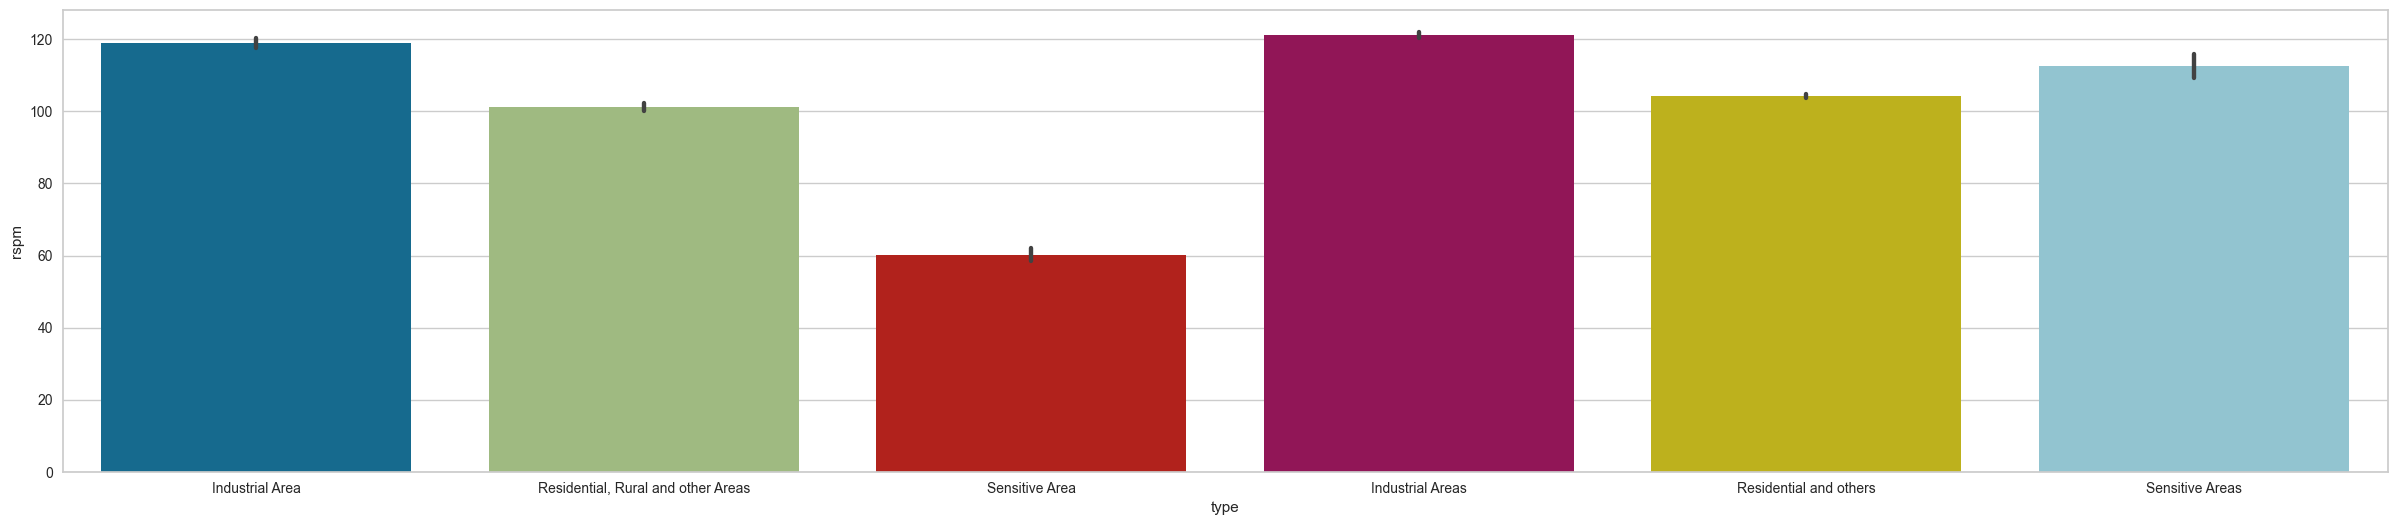

In [70]:
plt.figure(figsize = (30,6))
sns.barplot(x = 'type', y = 'rspm', data = data)

<Axes: xlabel='type', ylabel='spm'>

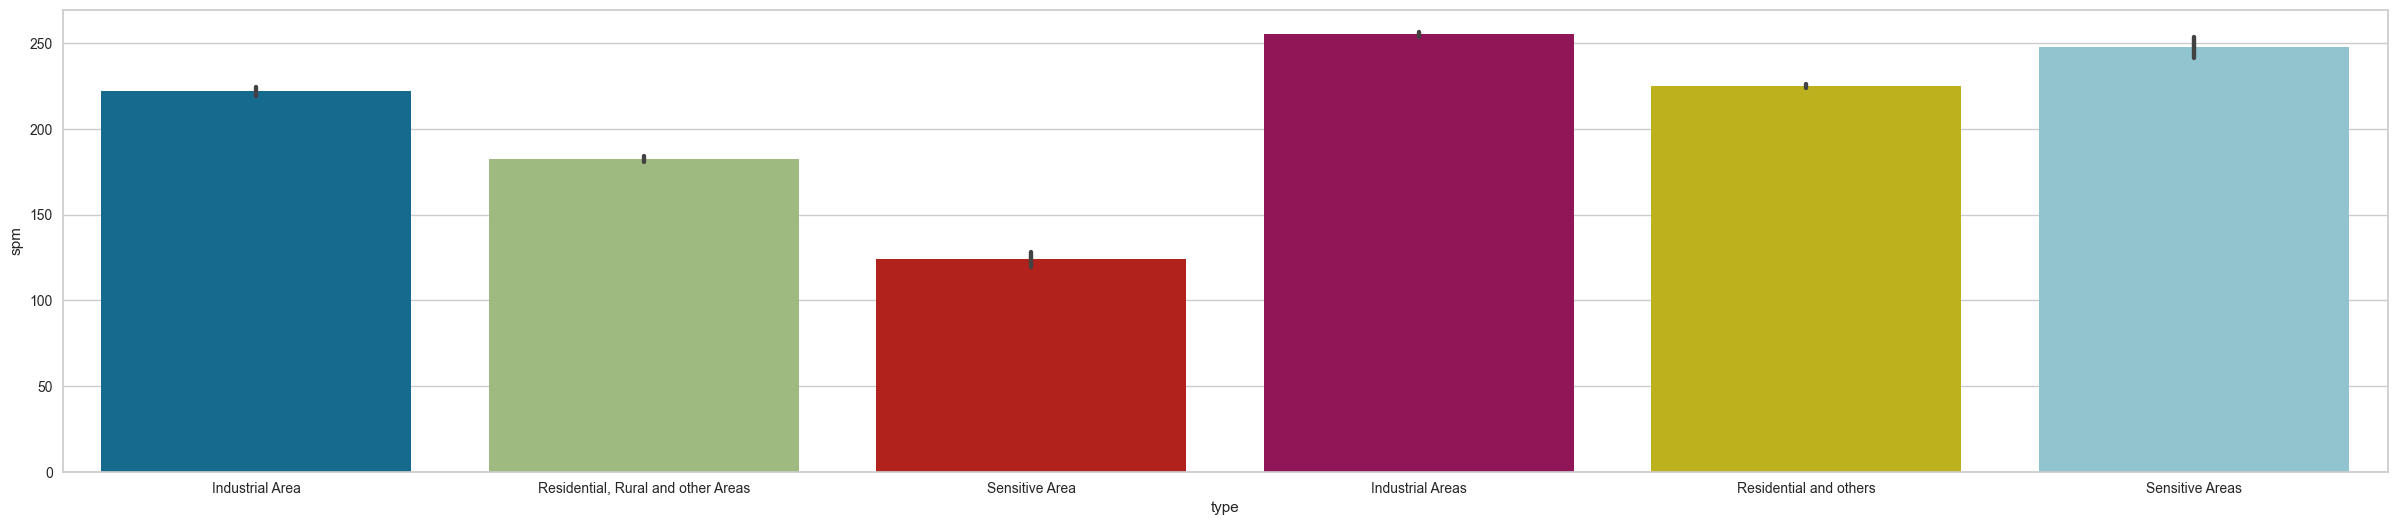

In [71]:
plt.figure(figsize = (30,6))
sns.barplot(x = 'type', y = 'spm', data = data)

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\889904013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['so2'])


([<matplotlib.axis.XTick at 0x187a327fd50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

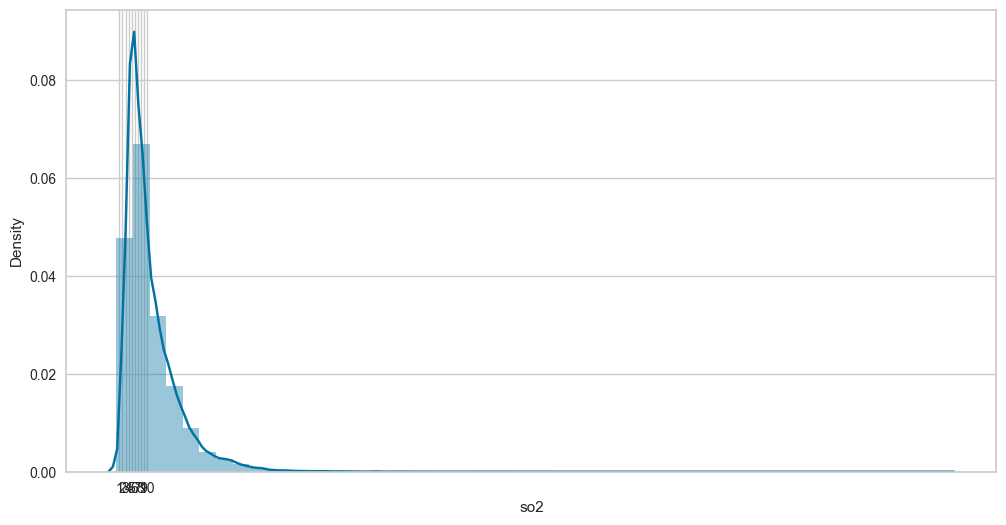

In [73]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(data['so2'])
plt.xticks(xdata)

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\2585632067.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['no2'])


([<matplotlib.axis.XTick at 0x187a1218610>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

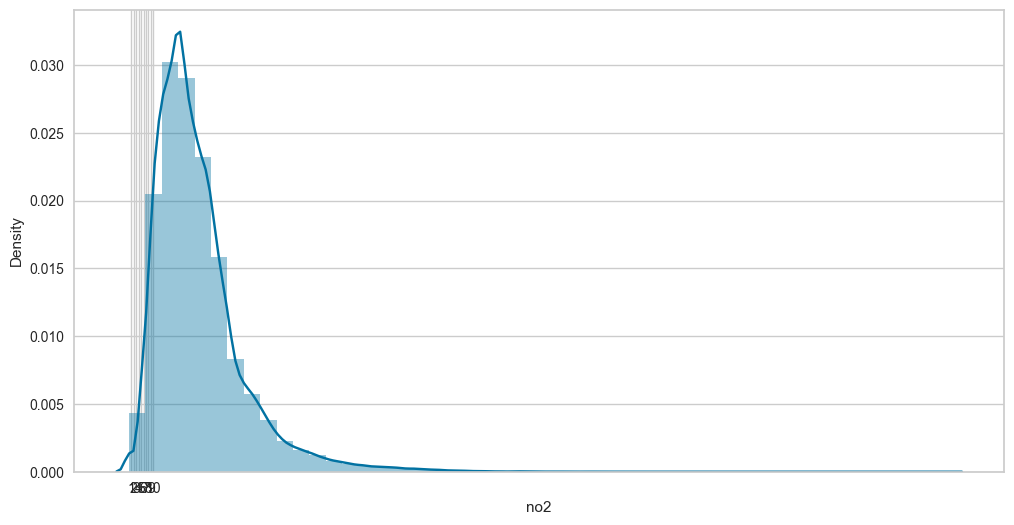

In [74]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(data['no2'])
plt.xticks(xdata)

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1979909389.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rspm'])


([<matplotlib.axis.XTick at 0x187a12d9810>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

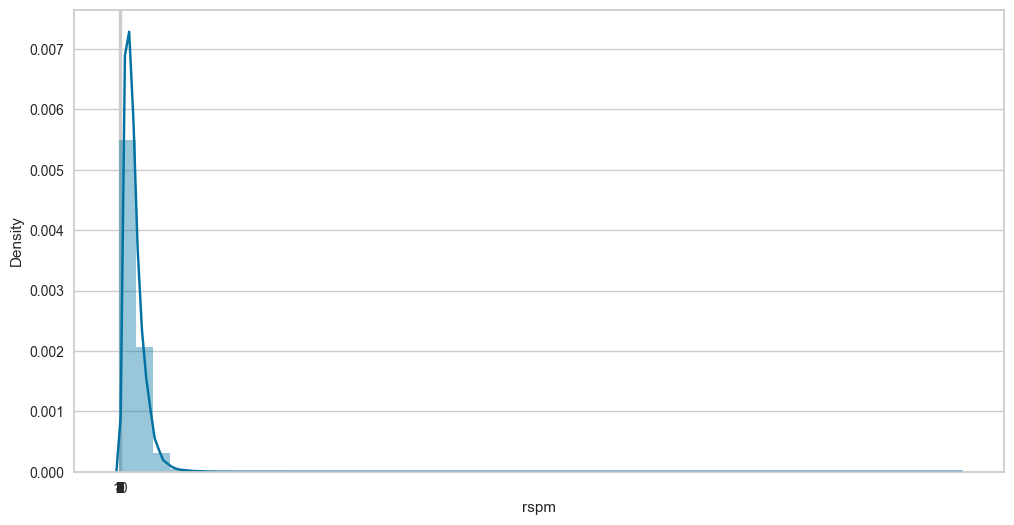

In [75]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(data['rspm'])
plt.xticks(xdata)

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\3172000778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['spm'])


([<matplotlib.axis.XTick at 0x187a12d5f90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

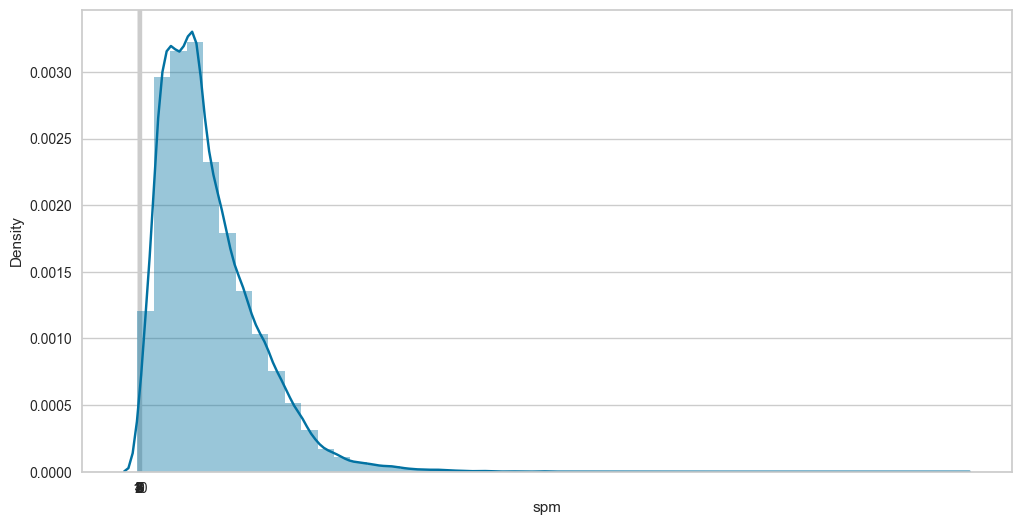

In [76]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(data['spm'])
plt.xticks(xdata)

<Axes: xlabel='spm', ylabel='Count'>

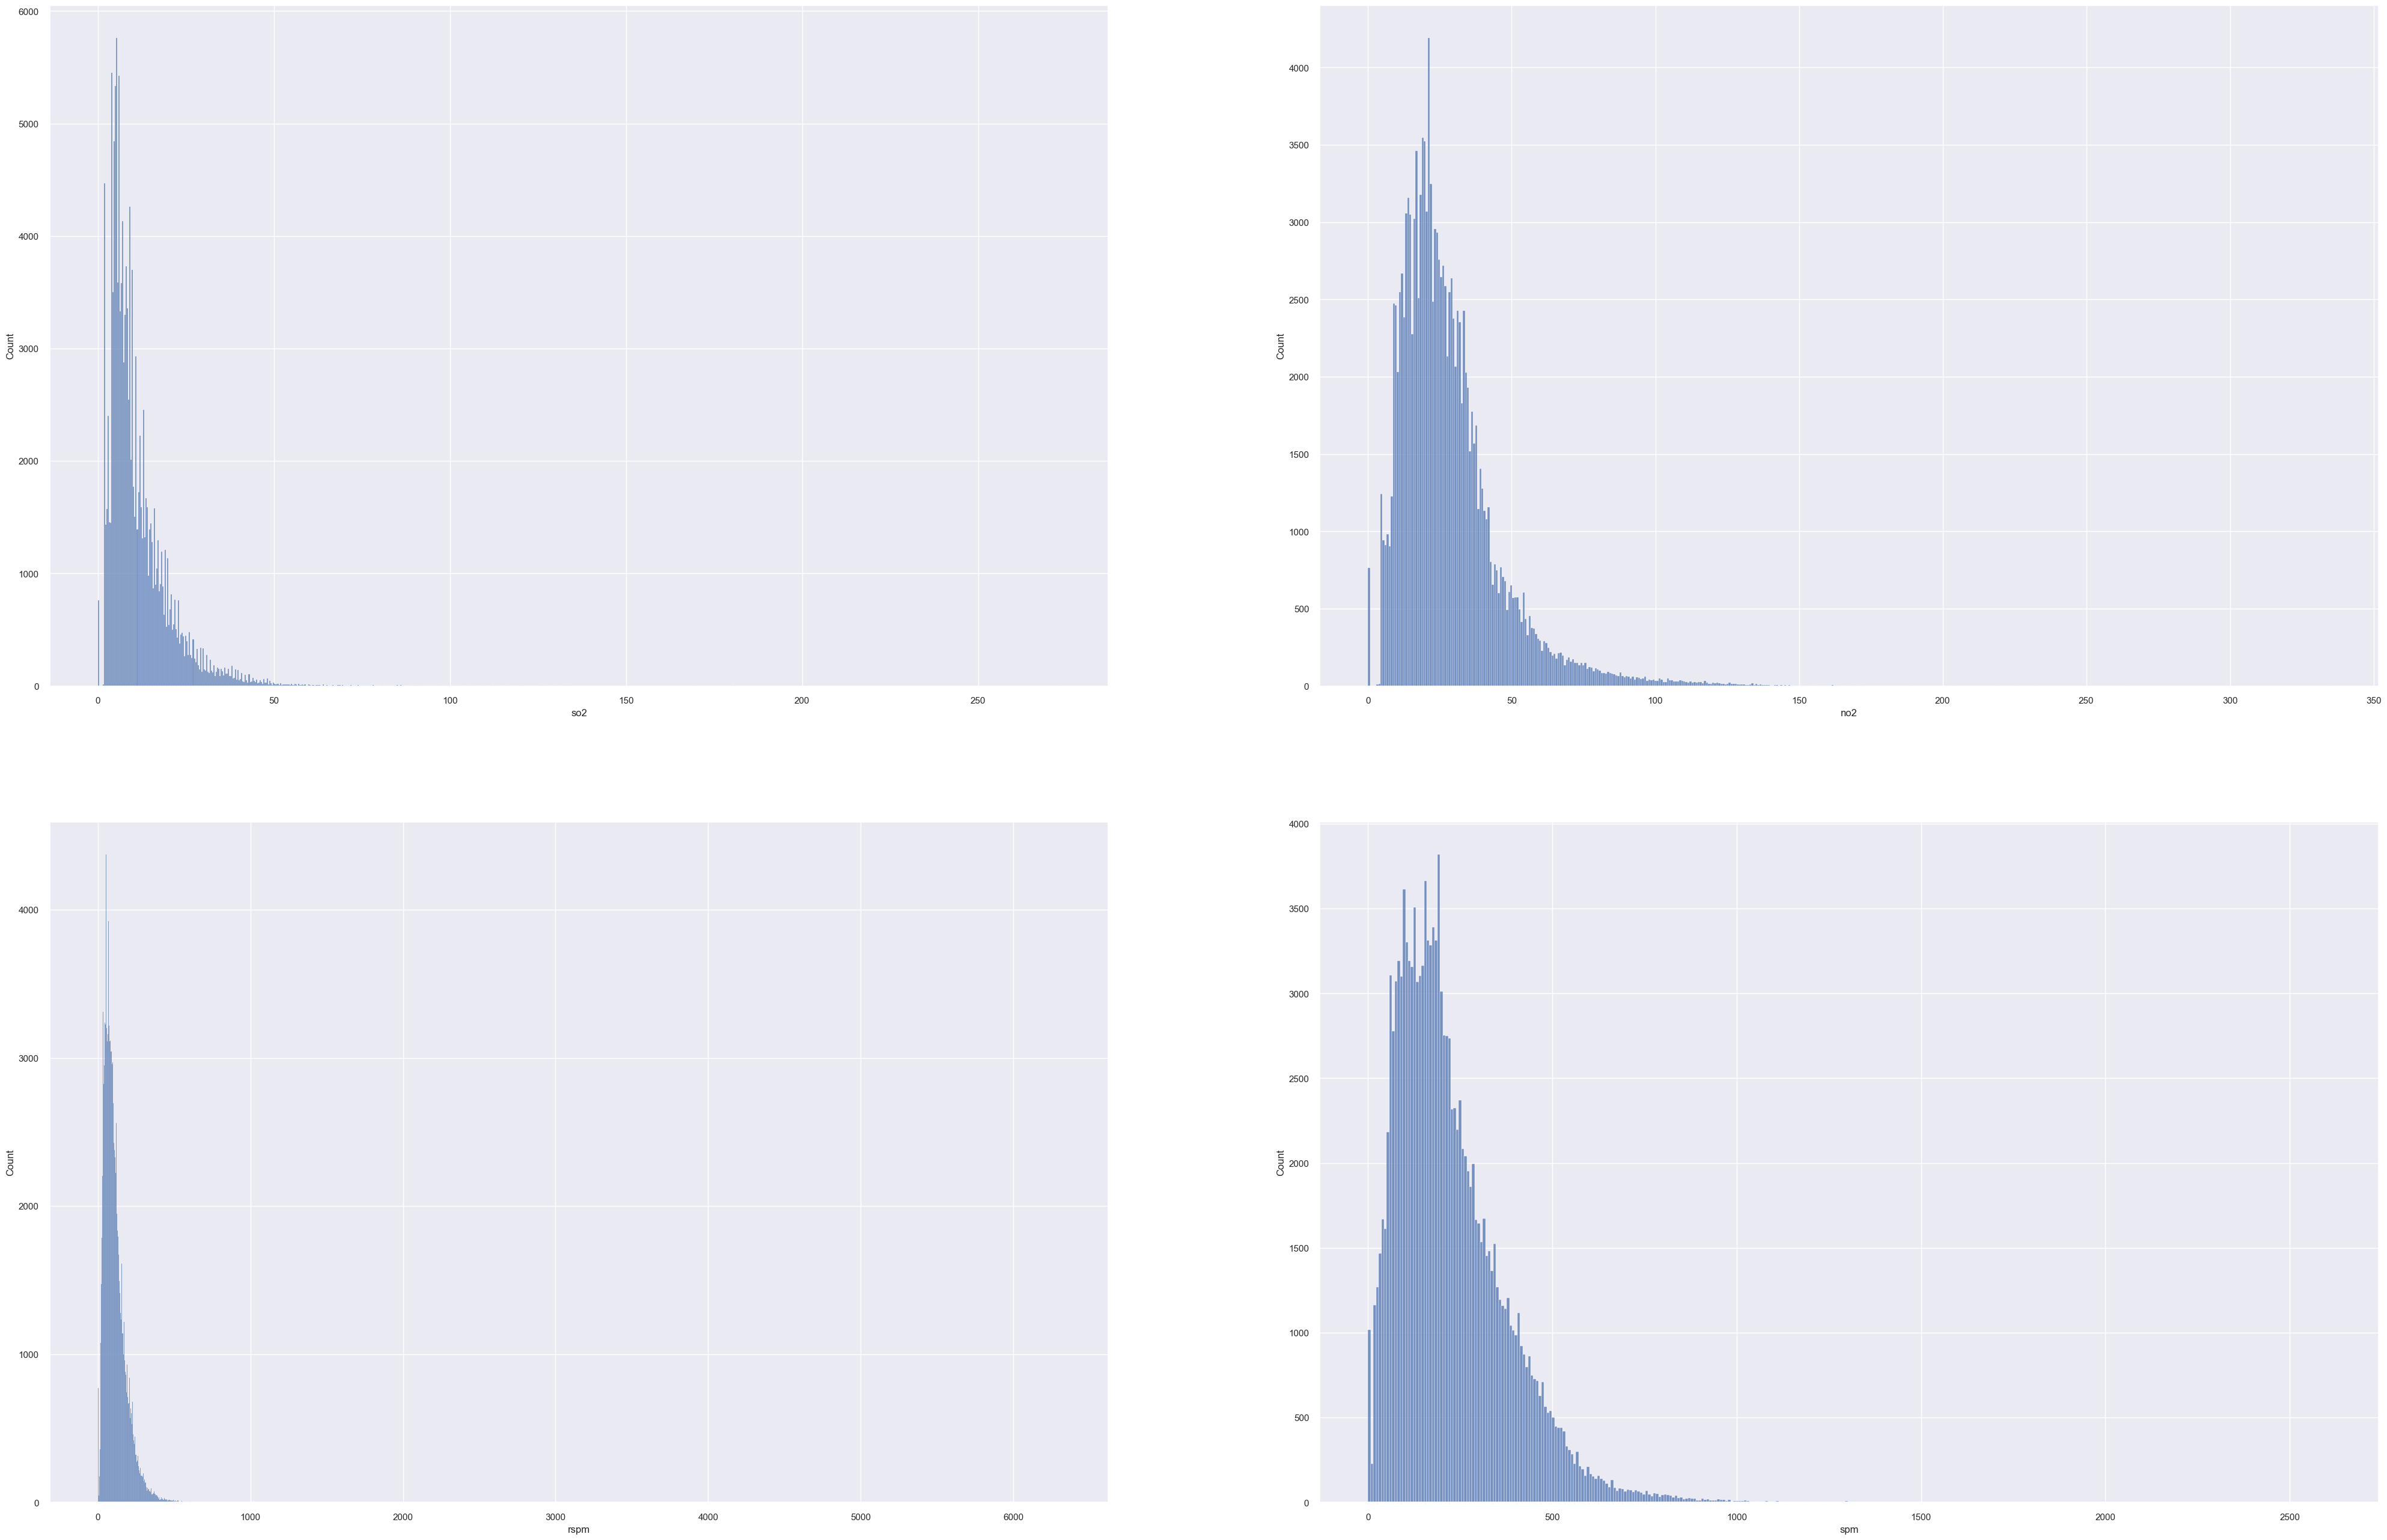

In [81]:
plt.figure(figsize = (50,50))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.histplot(data['so2'], kde = False)

plt.subplot(3,2,2)
sns.histplot(data['no2'], kde = False)

plt.subplot(3,2,3)
sns.histplot(data['rspm'], kde = False)

plt.subplot(3,2,4)
sns.histplot(data['spm'], kde = False)

<Axes: title={'center': 'Boxplot so2'}, xlabel='so2'>

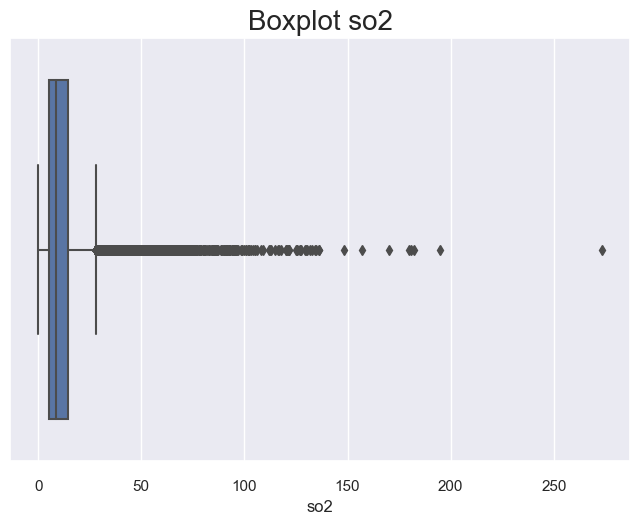

In [83]:
plt.title("Boxplot so2", fontdict = {'fontsize': 20})
sns.boxplot(x=data["so2"])

<Axes: title={'center': 'Boxplot no2'}, xlabel='no2'>

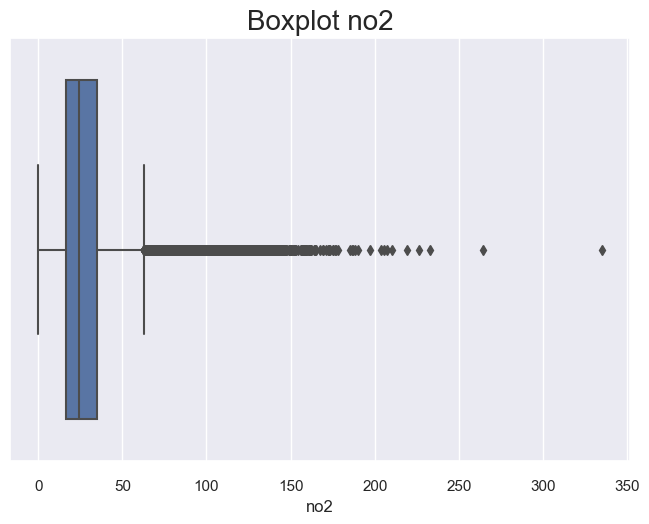

In [84]:
plt.title("Boxplot no2", fontdict = {'fontsize': 20})
sns.boxplot(x=data["no2"])

<Axes: title={'center': 'Boxplot rspm'}, xlabel='rspm'>

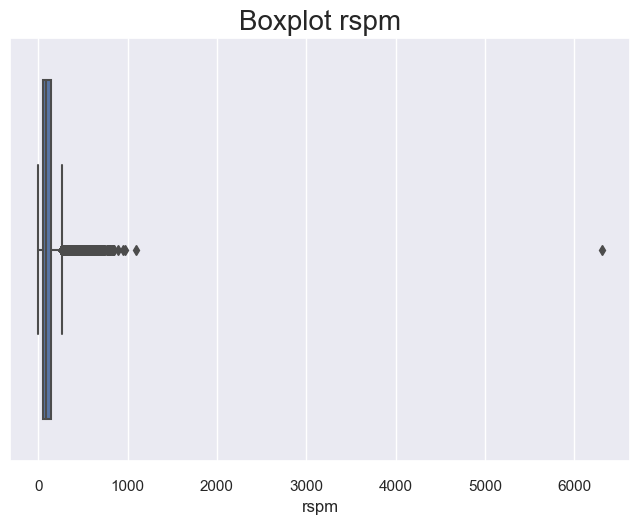

In [85]:
plt.title("Boxplot rspm", fontdict = {'fontsize': 20})
sns.boxplot(x=data["rspm"])

<Axes: title={'center': 'Boxplot spm'}, xlabel='spm'>

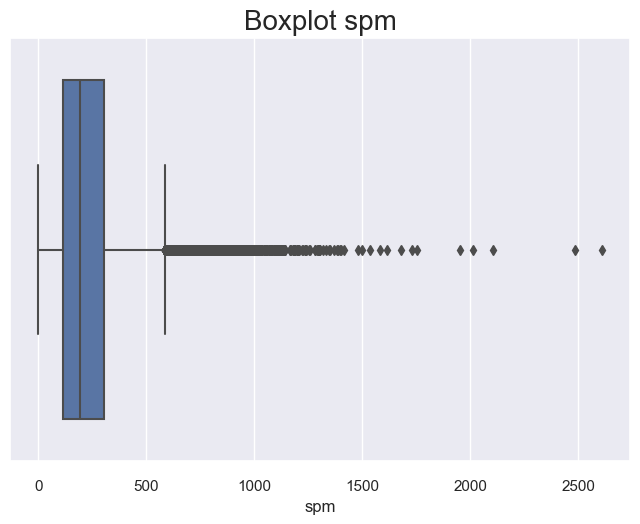

In [86]:
plt.title("Boxplot spm", fontdict = {'fontsize': 20})
sns.boxplot(x=data["spm"])

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\2377463718.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "state", y = "so2", palette = "Set2", data = data, height=3.5, aspect=10).set(title='state x so2')


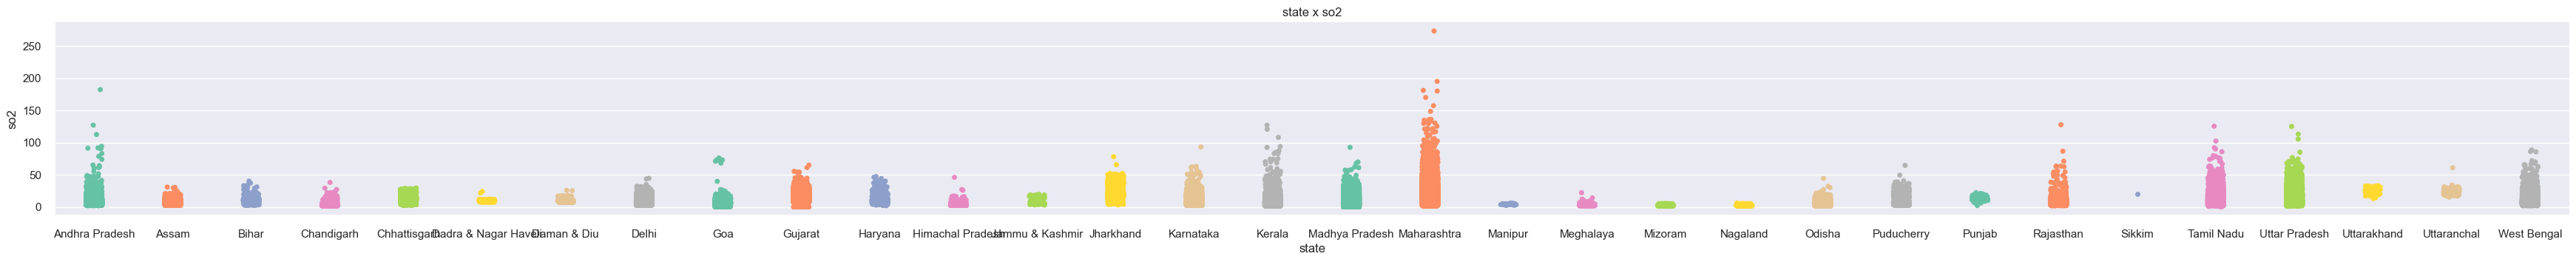

In [109]:
sns.catplot(x = "state", y = "so2", palette = "Set2", data = data, height=3.5, aspect=10).set(title='state x so2')

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\3773510521.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "state", y = "no2", palette = "Set2", data = data, height=3.5, aspect=10).set(title='state x no2')


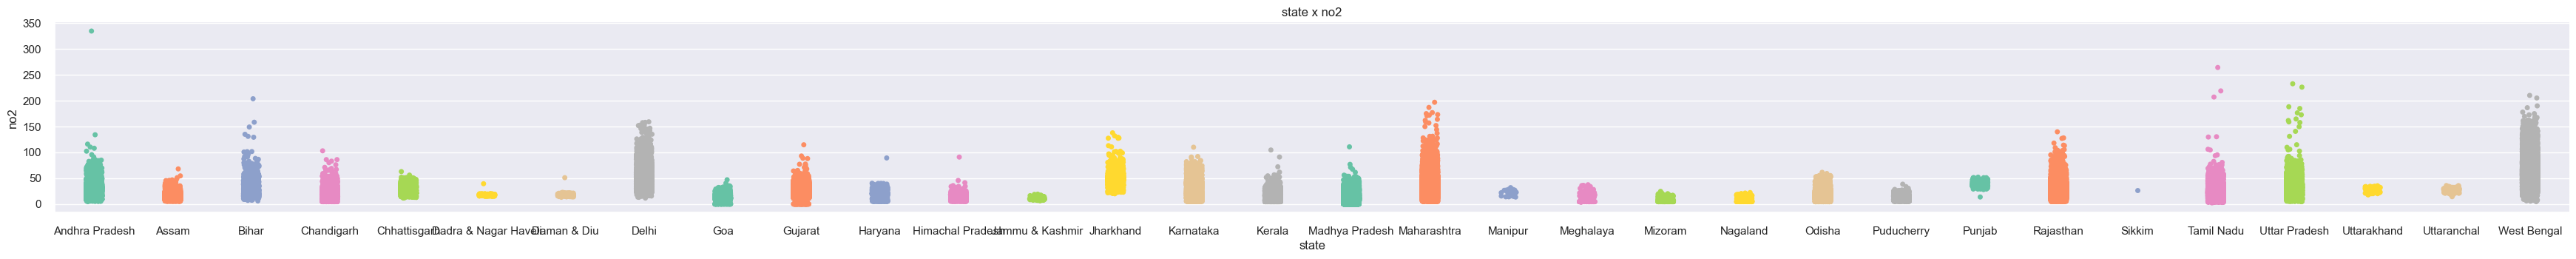

In [110]:
sns.catplot(x = "state", y = "no2", palette = "Set2", data = data, height=3.5, aspect=10).set(title='state x no2')

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\539750664.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "state", y = "rspm", palette = "Set2", data = data, height=3.5, aspect=10).set(title='state x rspm')


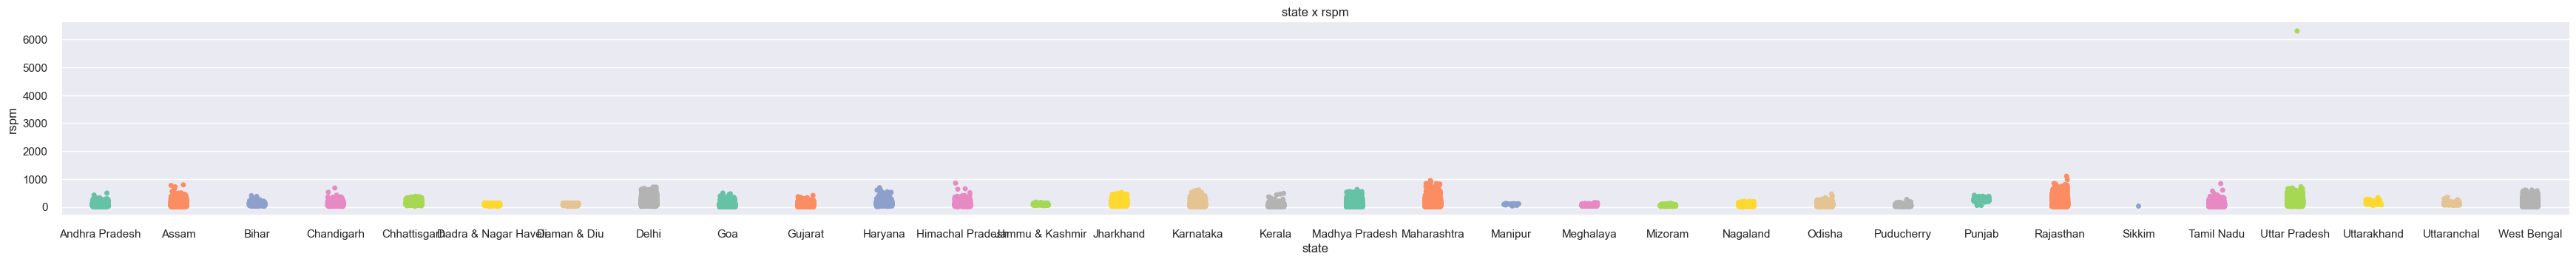

In [111]:
sns.catplot(x = "state", y = "rspm", palette = "Set2", data = data, height=3.5, aspect=10).set(title='state x rspm')

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\2170592189.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "state", y = "spm", palette = "Set2", data = data, height=3.5, aspect=10).set(title='state x spm')


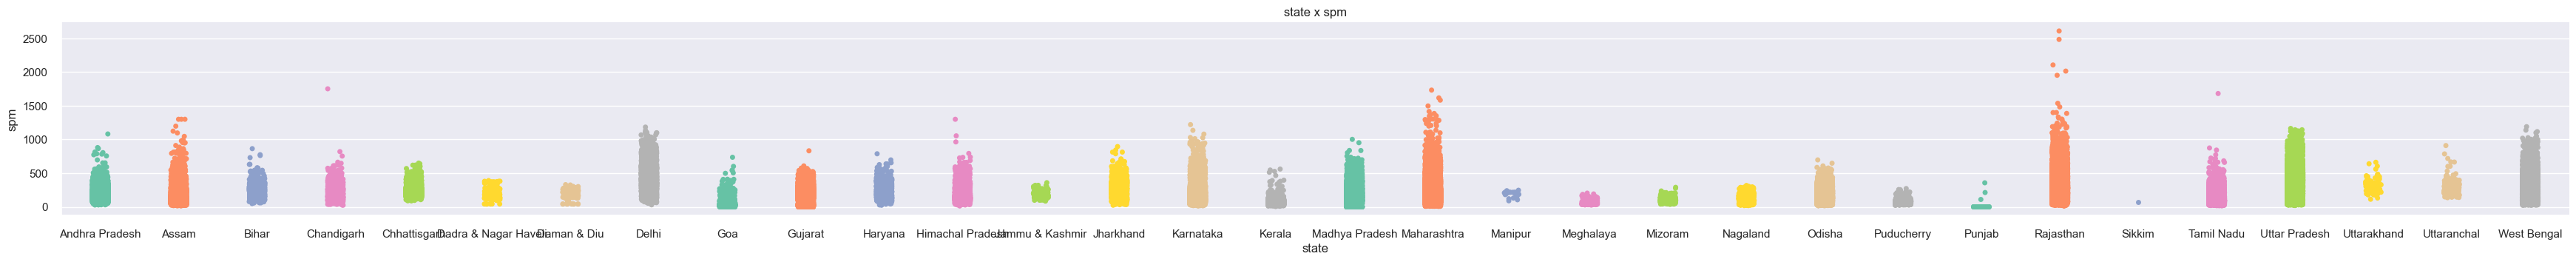

In [112]:
sns.catplot(x = "state", y = "spm", palette = "Set2", data = data, height=3.5, aspect=10).set(title='state x spm')

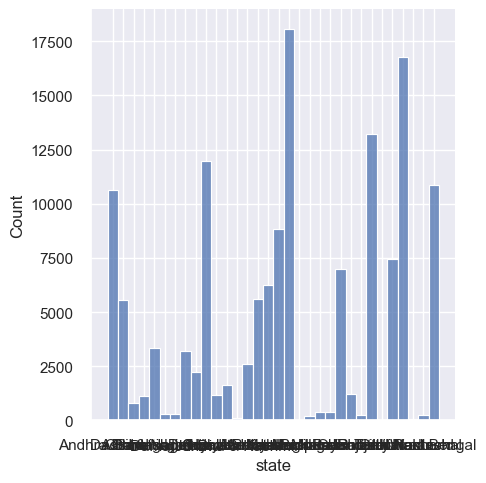

In [119]:
sns.displot(data['state'])

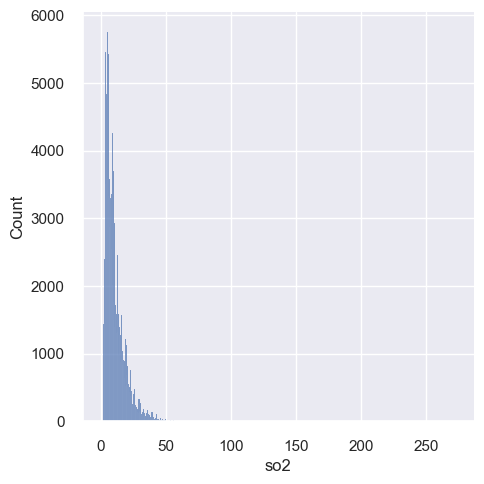

In [120]:
sns.displot(data['so2'])

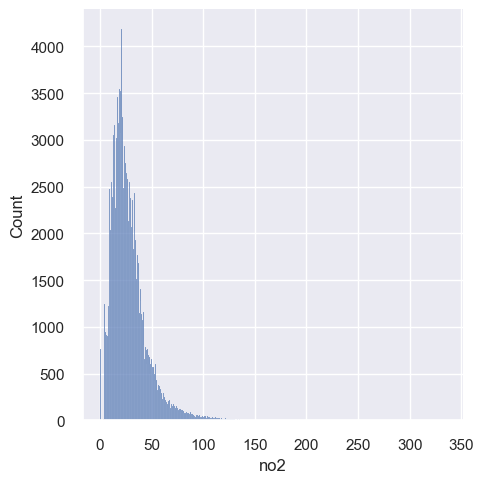

In [121]:
sns.displot(data['no2'])

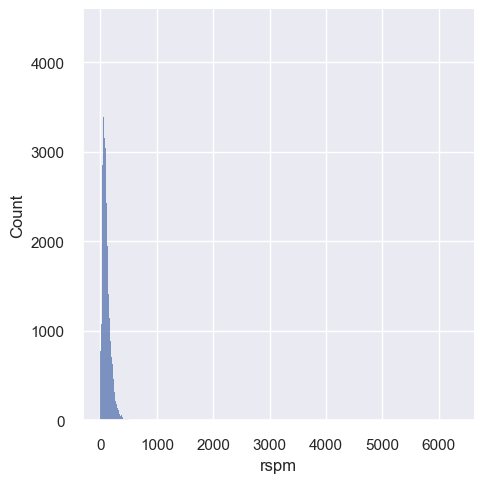

In [122]:
sns.displot(data['rspm'])

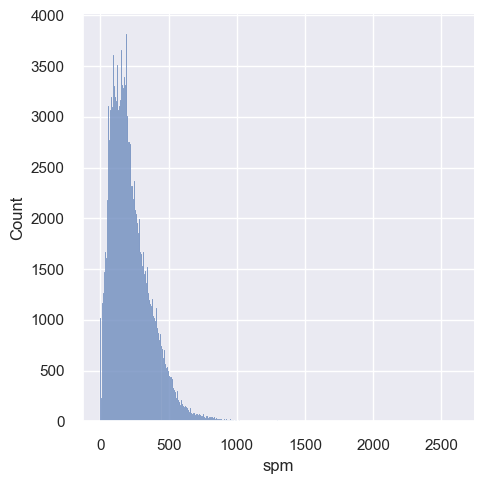

In [123]:
sns.displot(data['spm'])

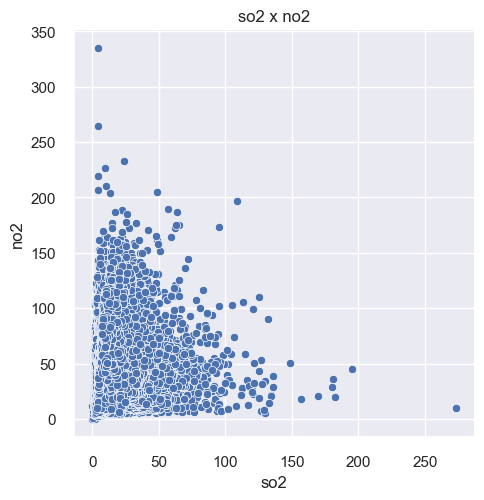

In [124]:
sns.relplot(x='so2', y = 'no2' , data = data).set(title='so2 x no2')

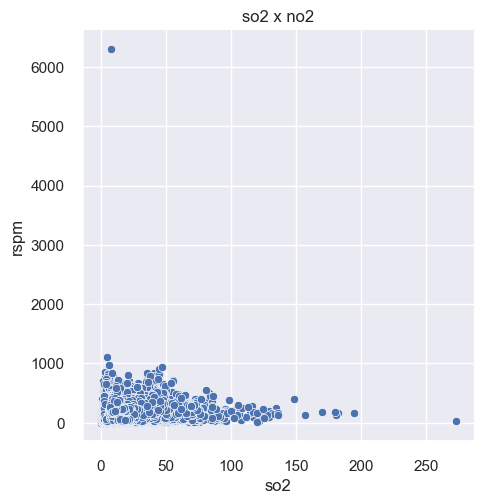

In [125]:
sns.relplot(x='so2', y = 'rspm' , data = data).set(title='so2 x no2')

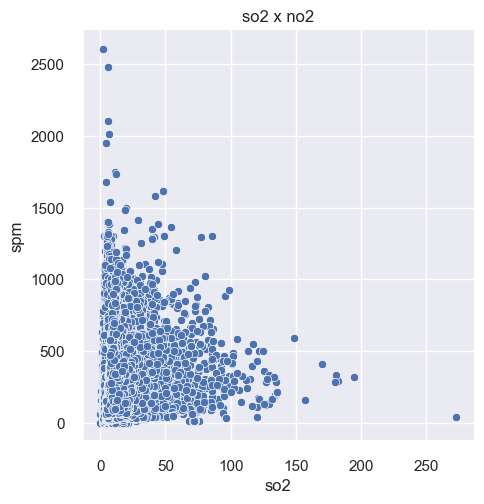

In [126]:
sns.relplot(x='so2', y = 'spm' , data = data).set(title='so2 x no2')

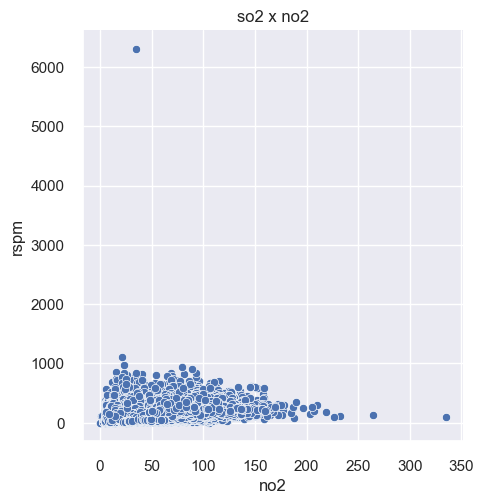

In [127]:
sns.relplot(x='no2', y = 'rspm' , data = data).set(title='so2 x no2')

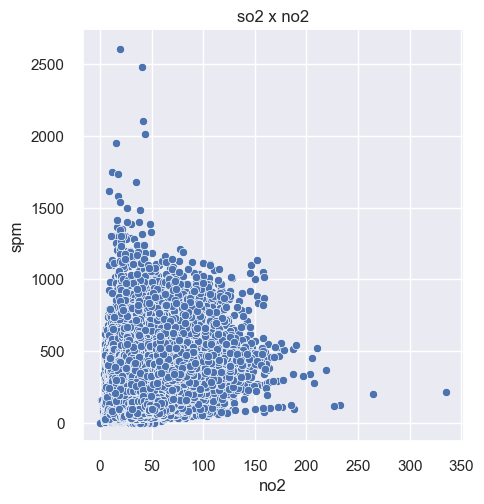

In [128]:
sns.relplot(x='no2', y = 'spm' , data = data).set(title='so2 x no2')

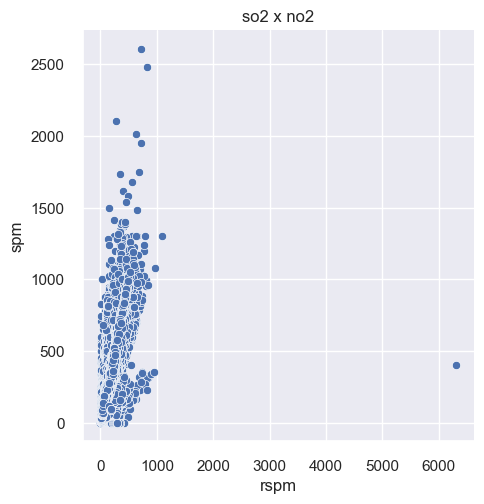

In [129]:
sns.relplot(x='rspm', y = 'spm' , data = data).set(title='so2 x no2')

In [137]:
def get_distplot(col):
    ax = sns.distplot(data[col], bins = 6)
    Q1 = np.percentile(data[col],25)
    Q3 = np.percentile(data[col],75)
    IQR=Q3-Q1    
    lower_threshold = Q1 - 1.5*IQR
    upper_threshold = Q3 + 1.5*IQR
    
    ax.axvline(Q1, color='red', linestyle='-', label="Q1")
    ax.axvline(Q3, color='blue', linestyle='-', label="Q3")
    ax.axvline(lower_threshold, color='yellow', linestyle='-', label="Lower threshold")
    ax.axvline(upper_threshold, color='green', linestyle='-', label="Upper threshold")
    ax.legend()

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)


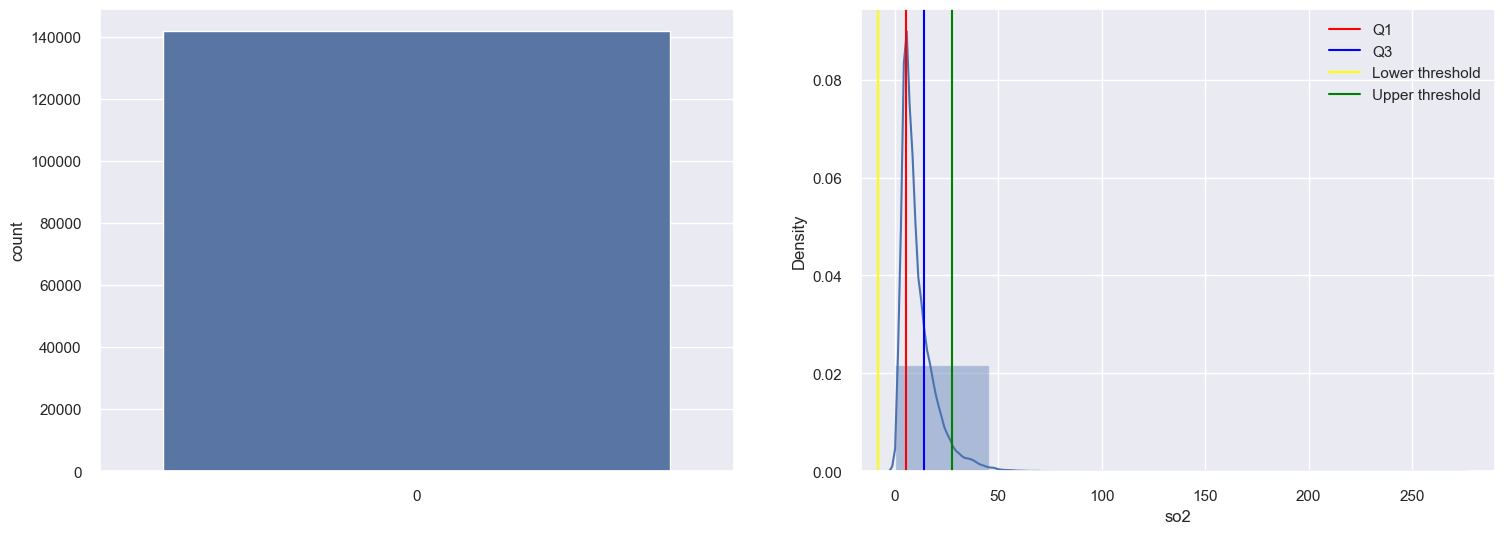

In [138]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
ax1 = sns.countplot(data['so2'])
ax2 = fig.add_subplot(122)
ax2 = get_distplot('so2')
plt.show()

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)


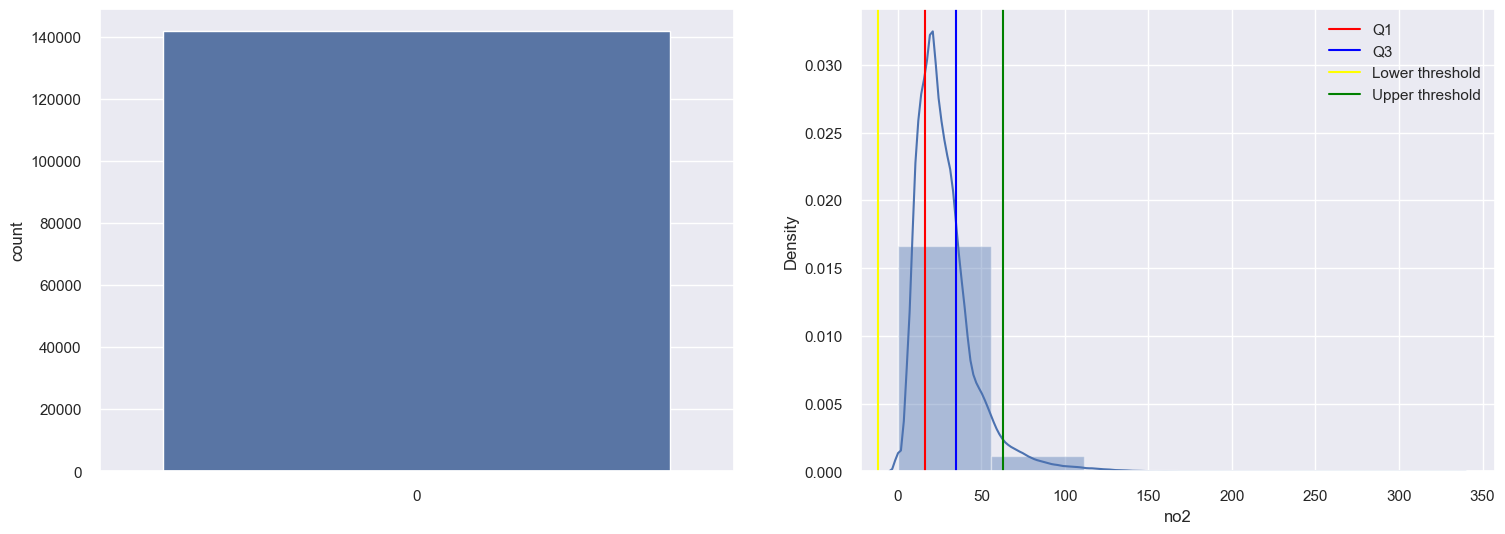

In [139]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
ax1 = sns.countplot(data['no2'])
ax2 = fig.add_subplot(122)
ax2 = get_distplot('no2')
plt.show()

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)


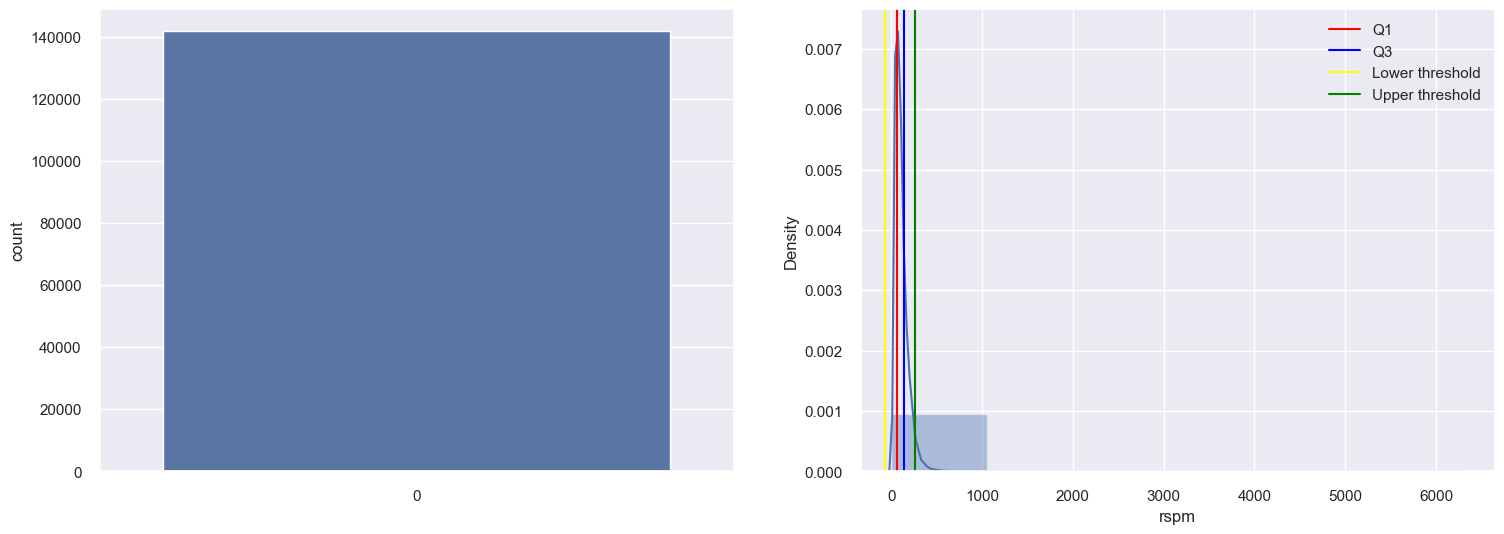

In [140]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
ax1 = sns.countplot(data['rspm'])
ax2 = fig.add_subplot(122)
ax2 = get_distplot('rspm')
plt.show()

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)


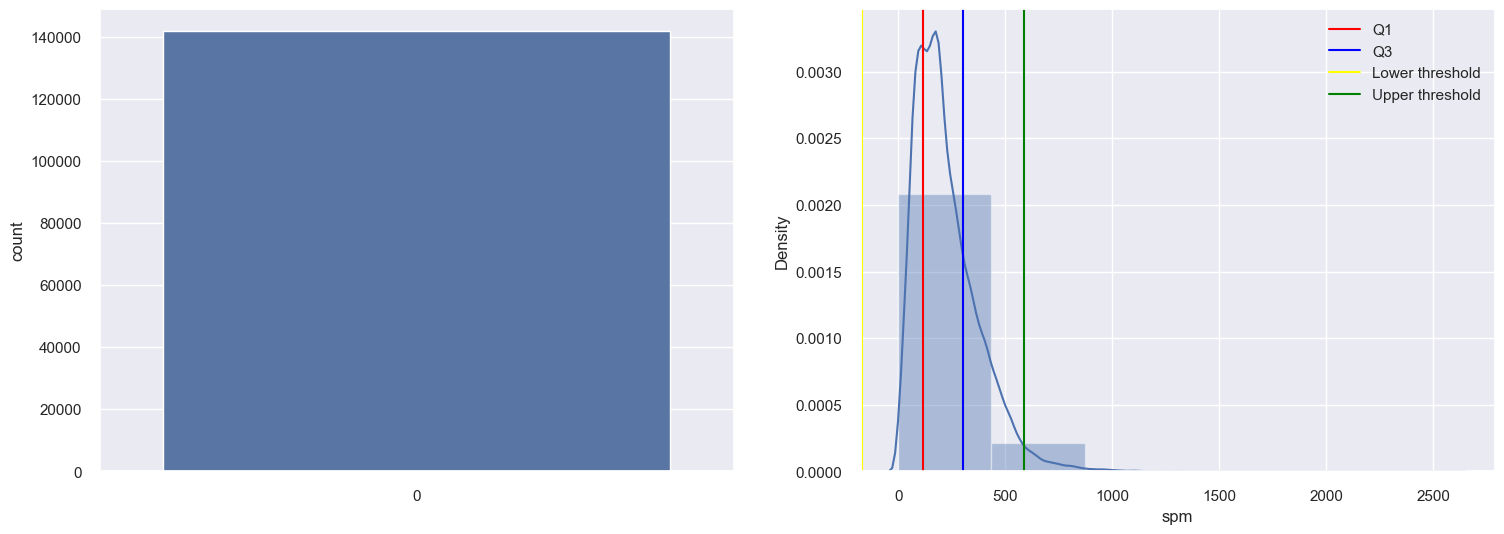

In [141]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
ax1 = sns.countplot(data['spm'])
ax2 = fig.add_subplot(122)
ax2 = get_distplot('spm')
plt.show()

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)
C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)
C:\U

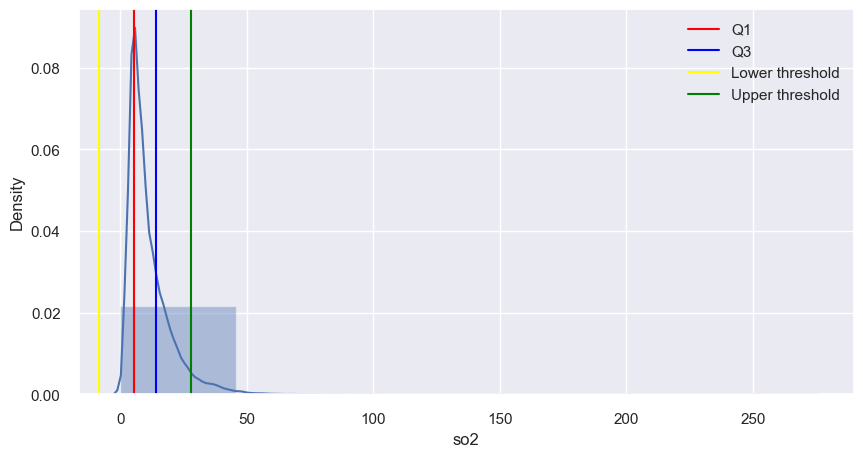

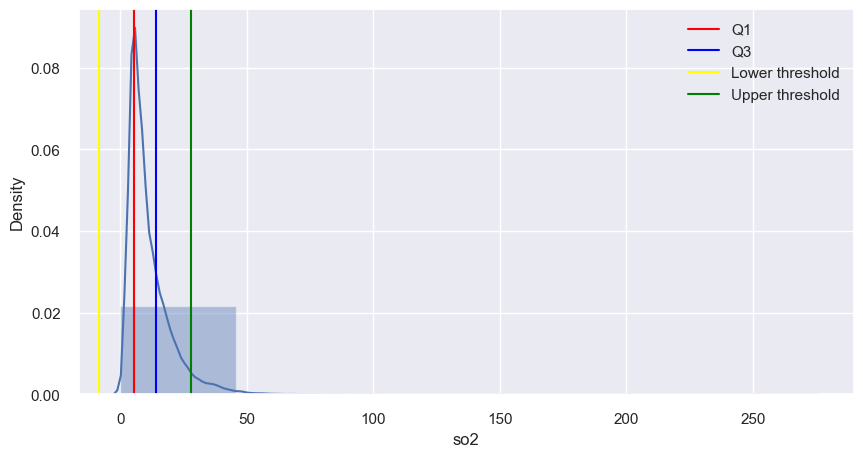

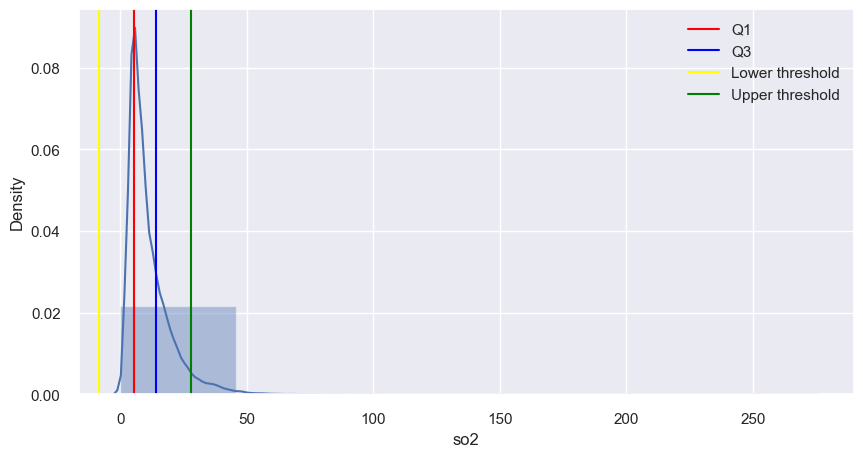

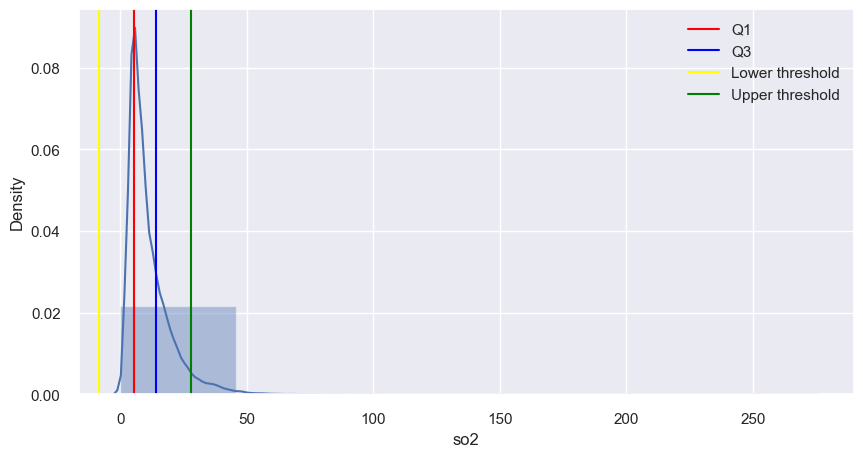

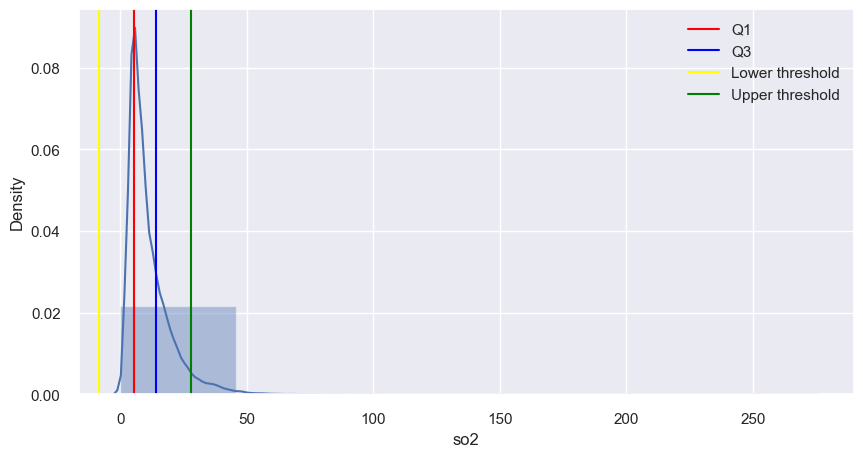

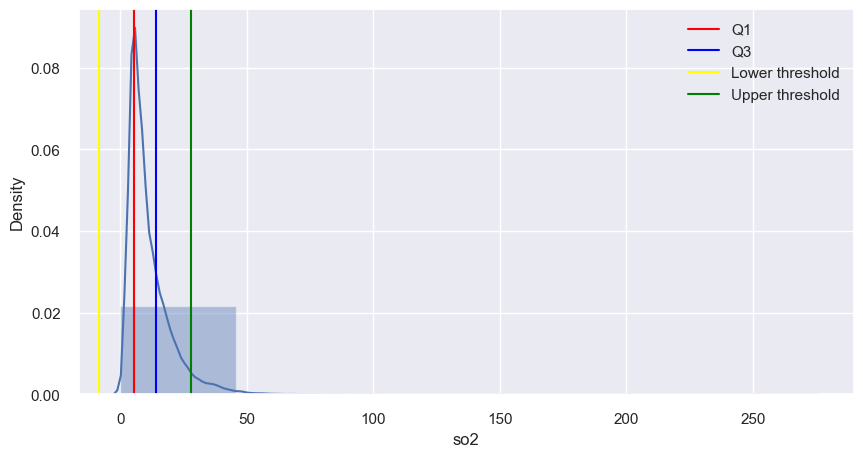

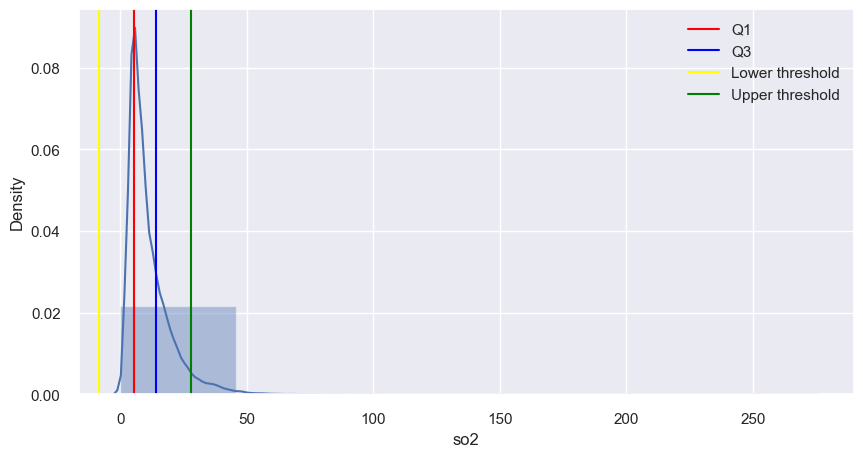

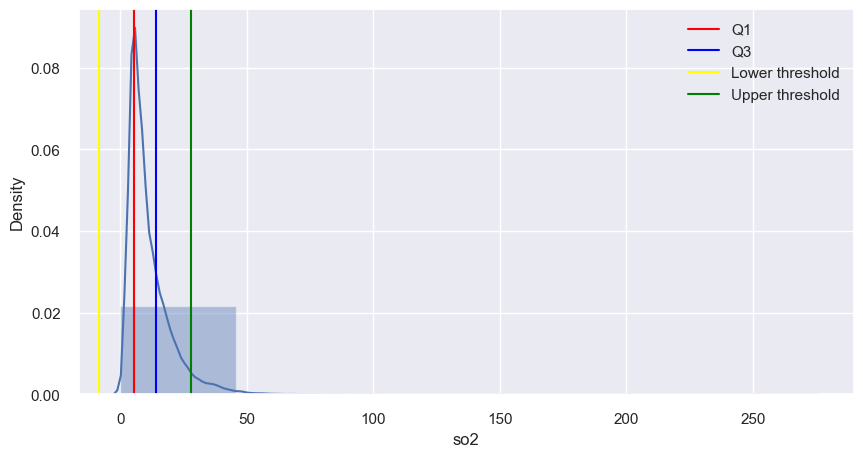

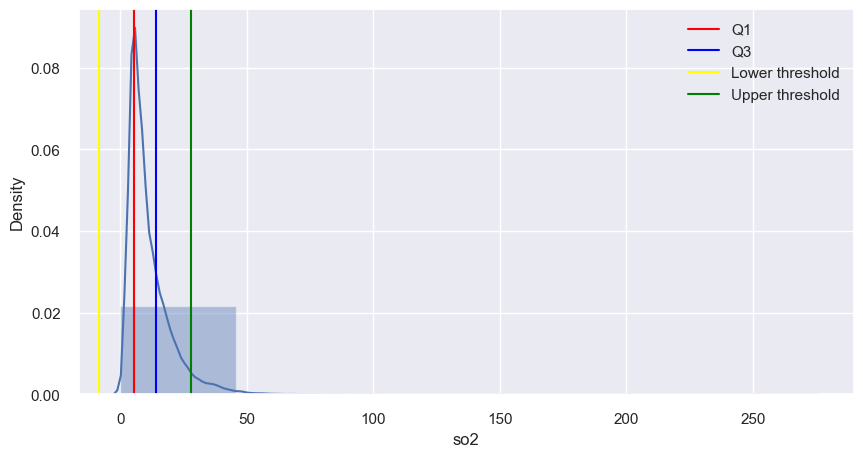

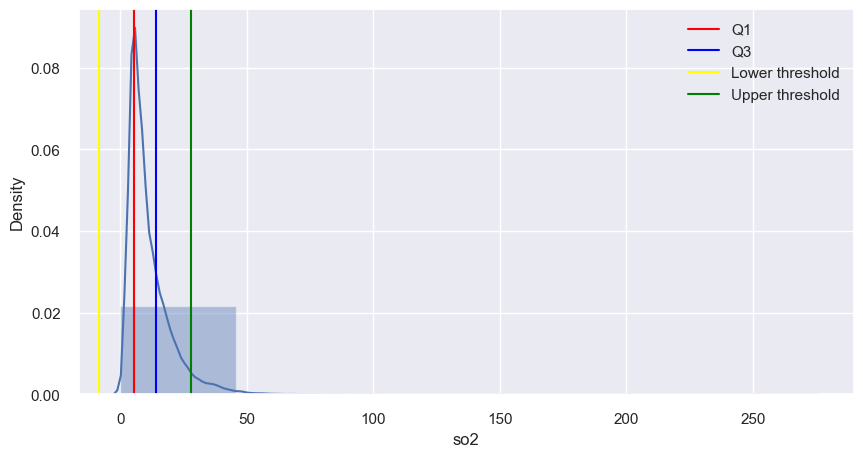

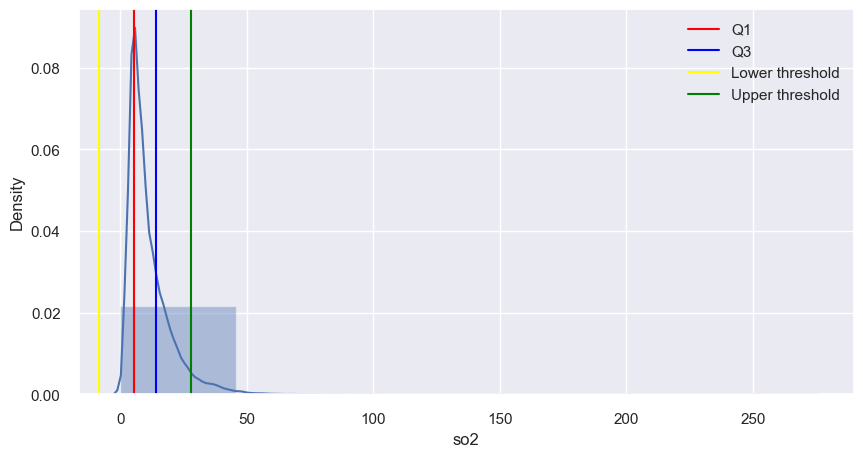

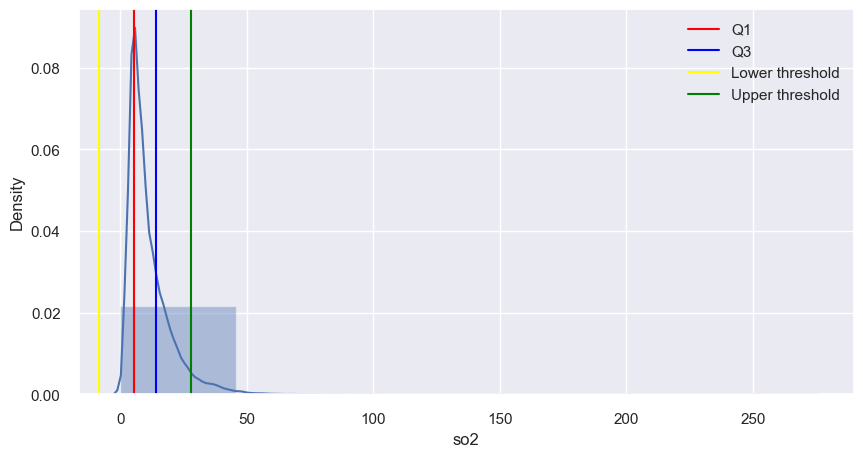

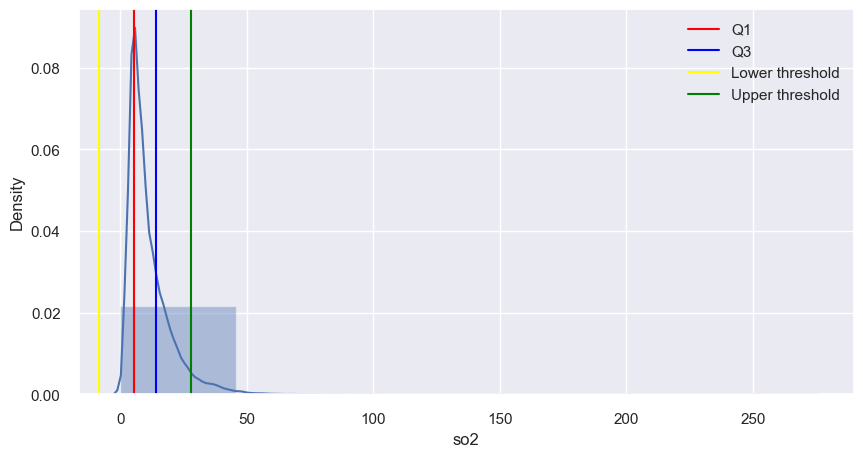

In [144]:
for i in data.columns:
    f, (ax1) = plt.subplots(1,1,figsize=(10,5))
    ax1 = get_distplot('so2')

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)
C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)
C:\U

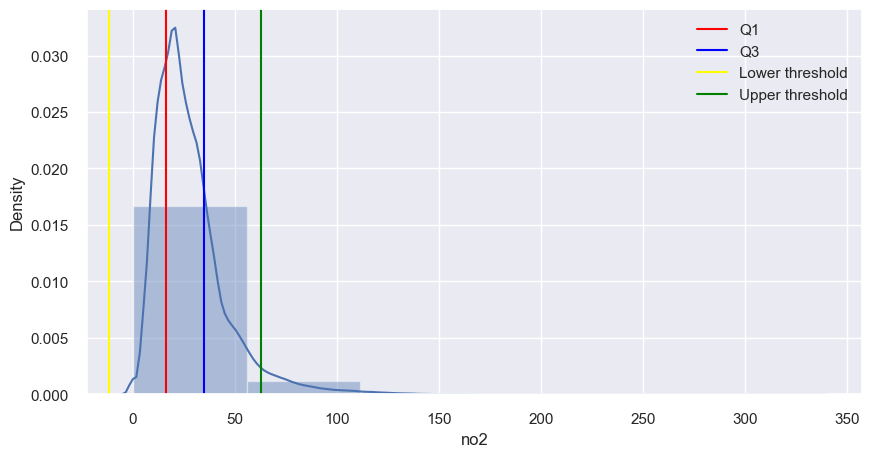

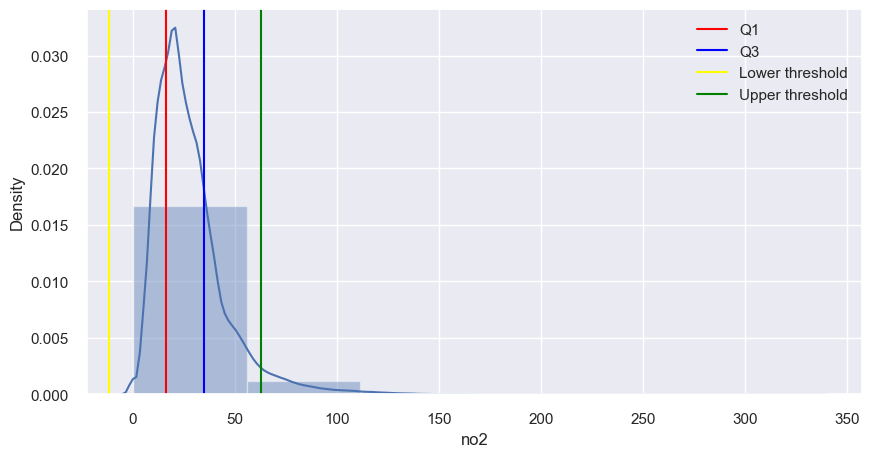

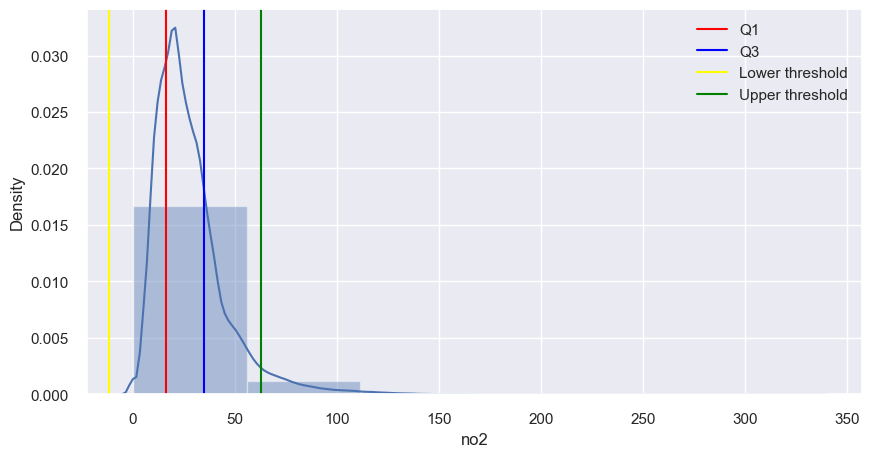

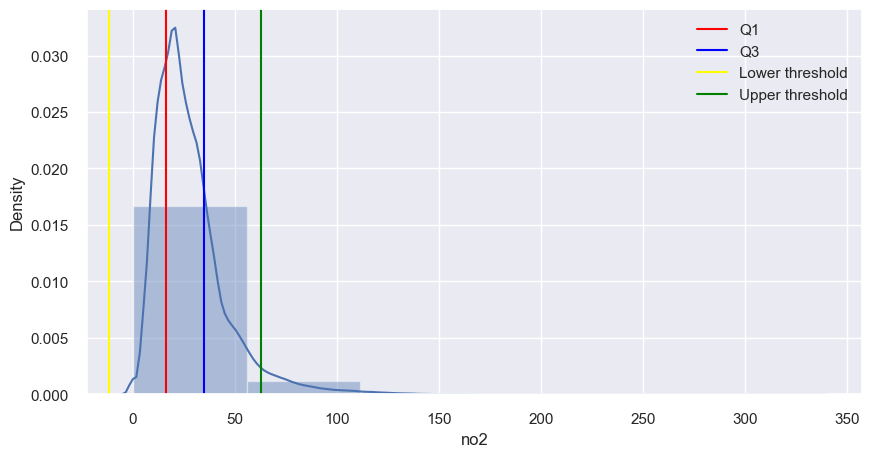

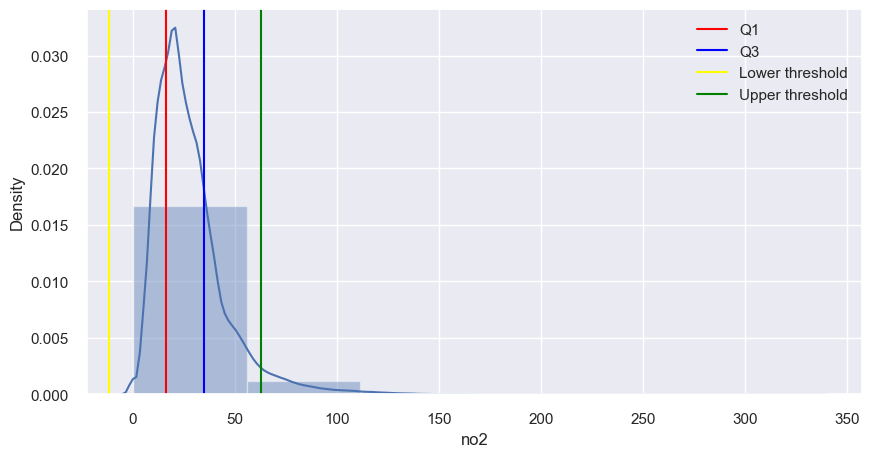

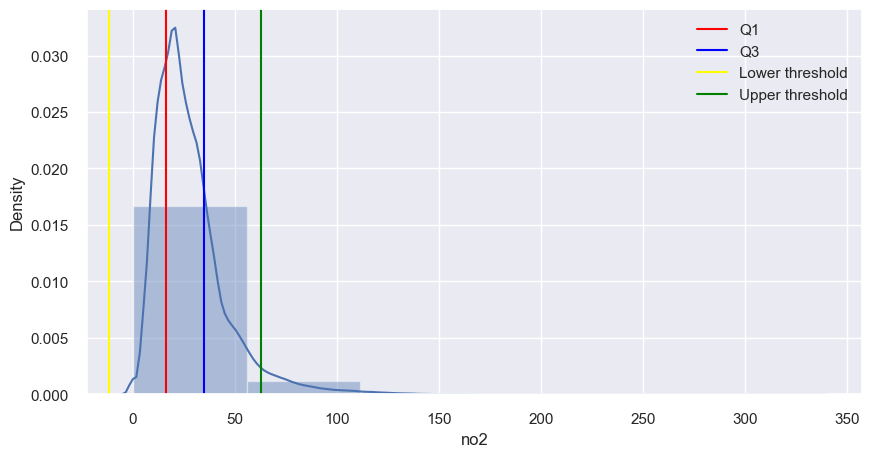

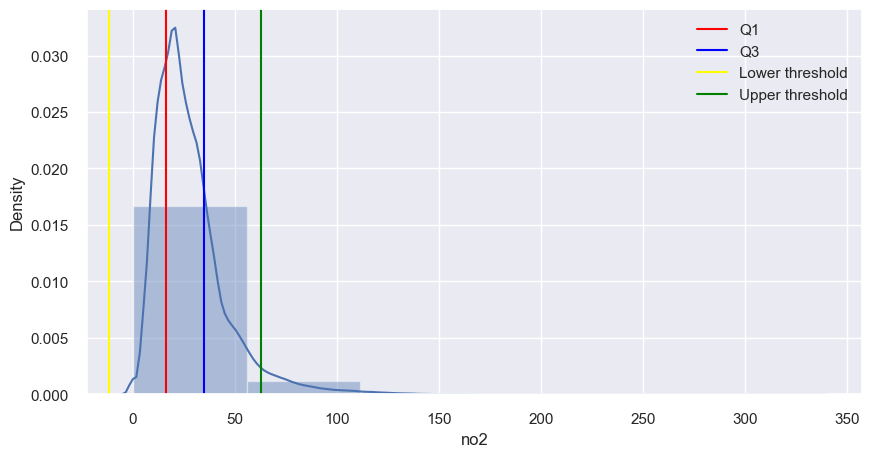

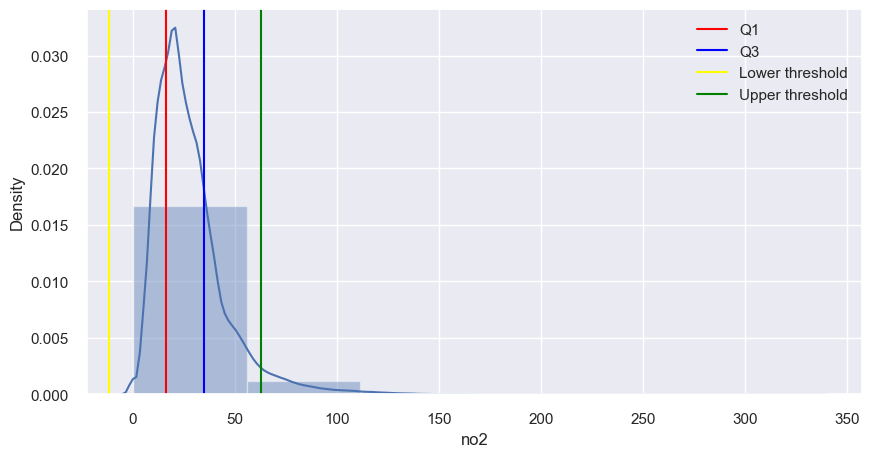

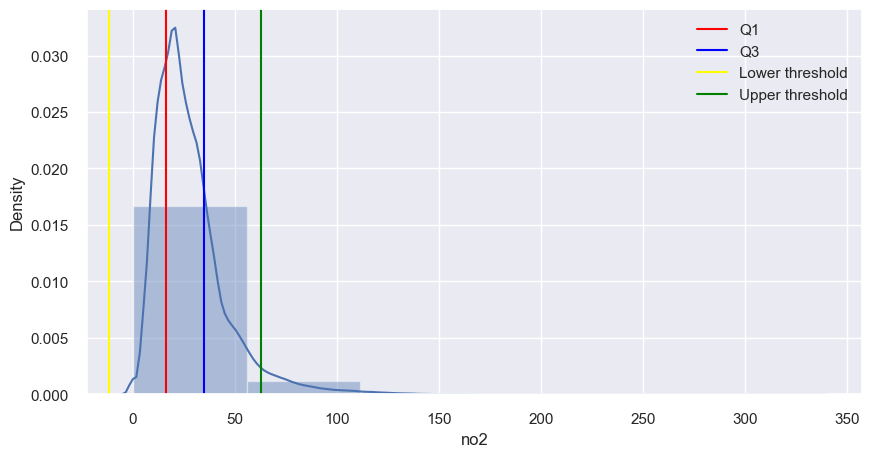

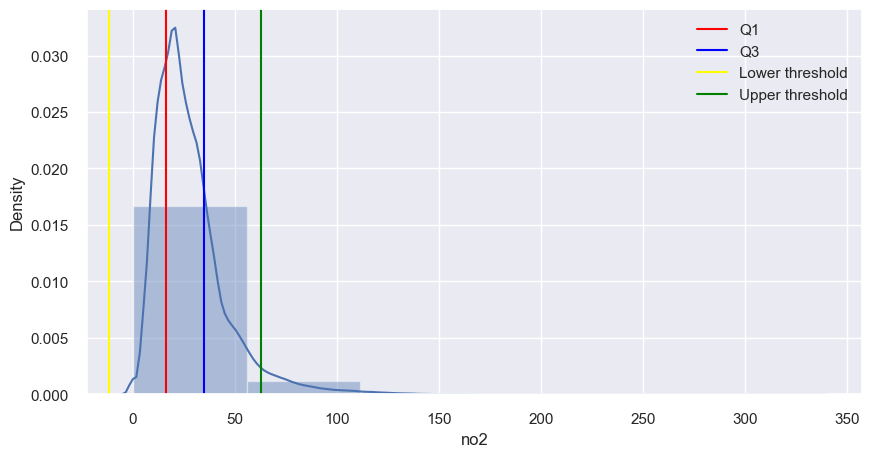

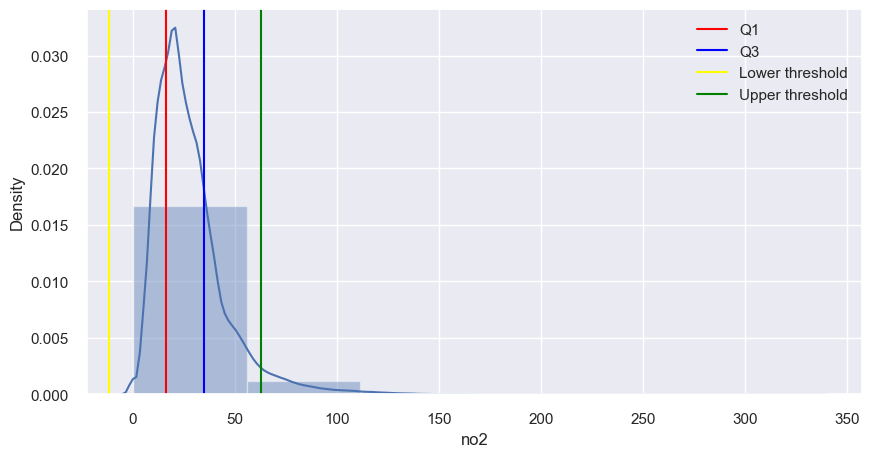

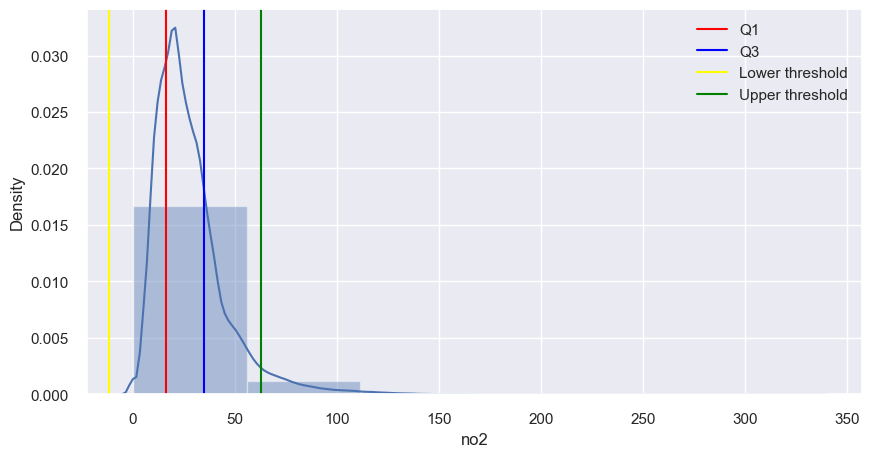

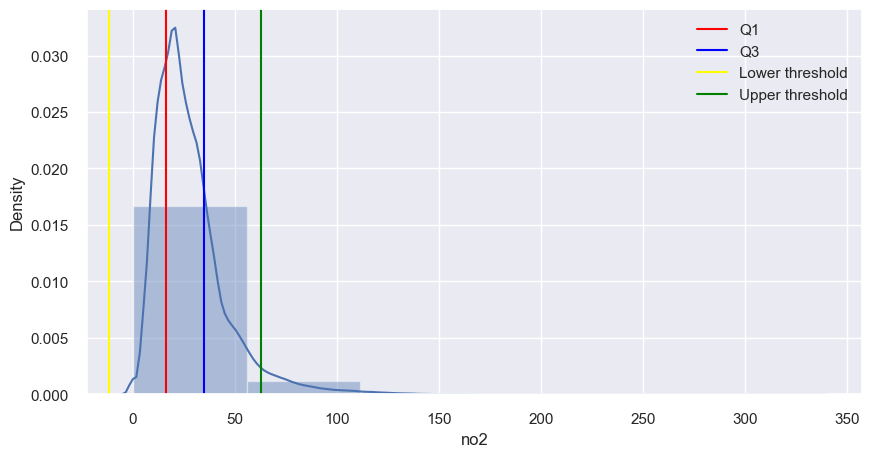

In [145]:
for i in data.columns:
    f, (ax1) = plt.subplots(1,1,figsize=(10,5))
    ax1 = get_distplot('no2')

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)
C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)
C:\U

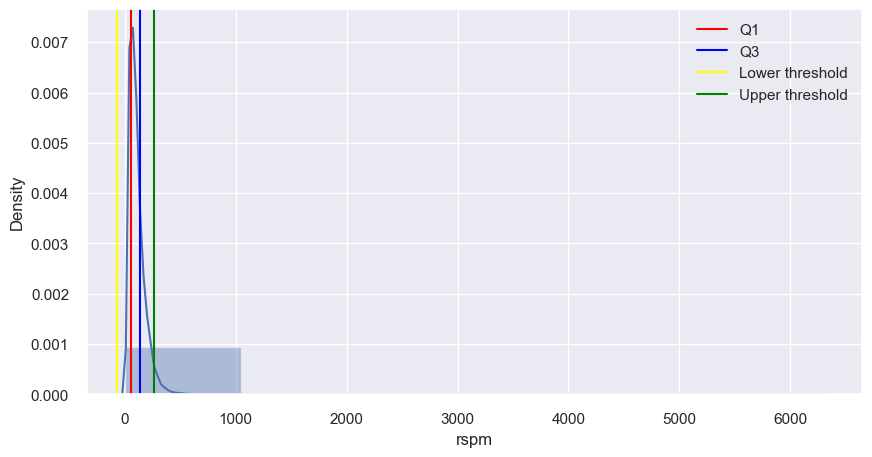

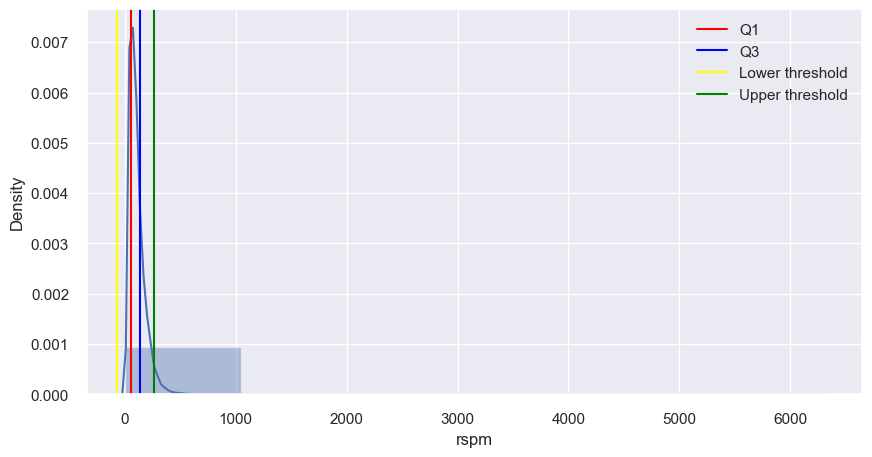

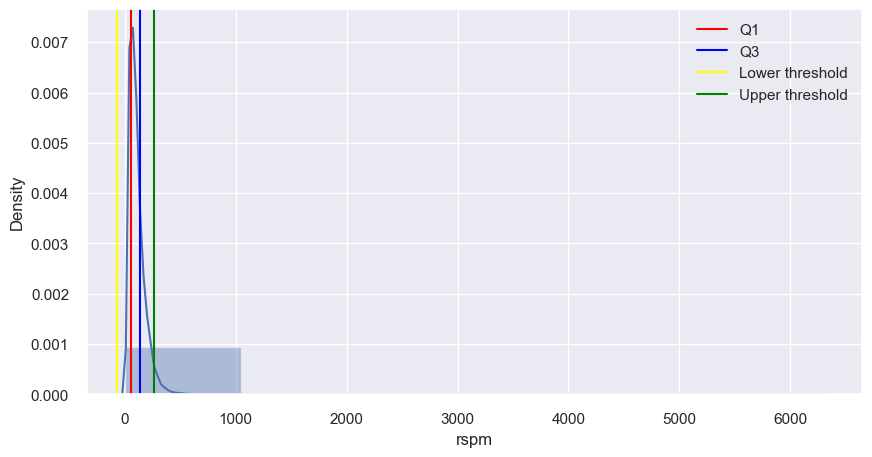

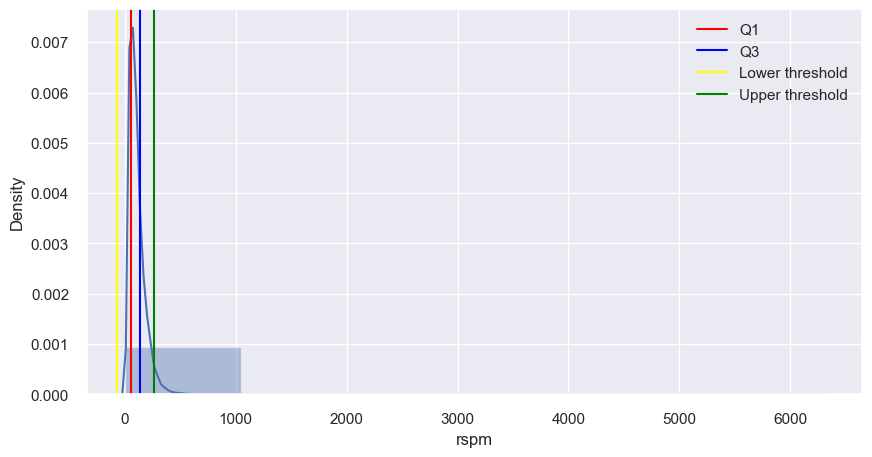

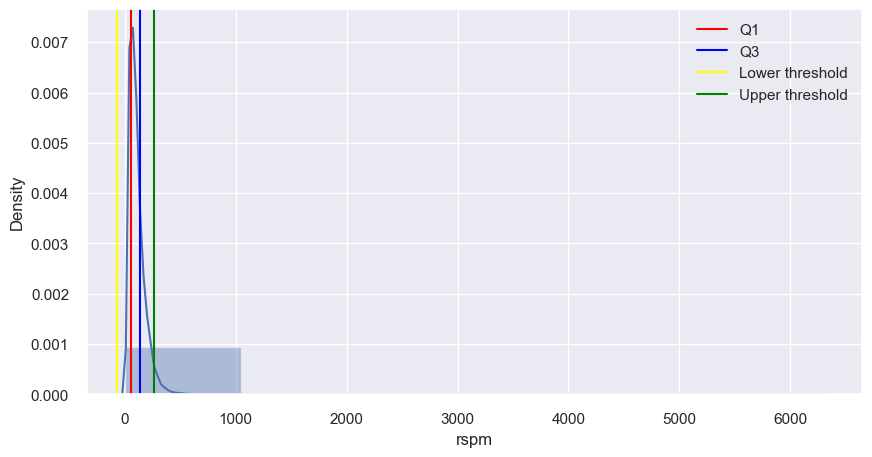

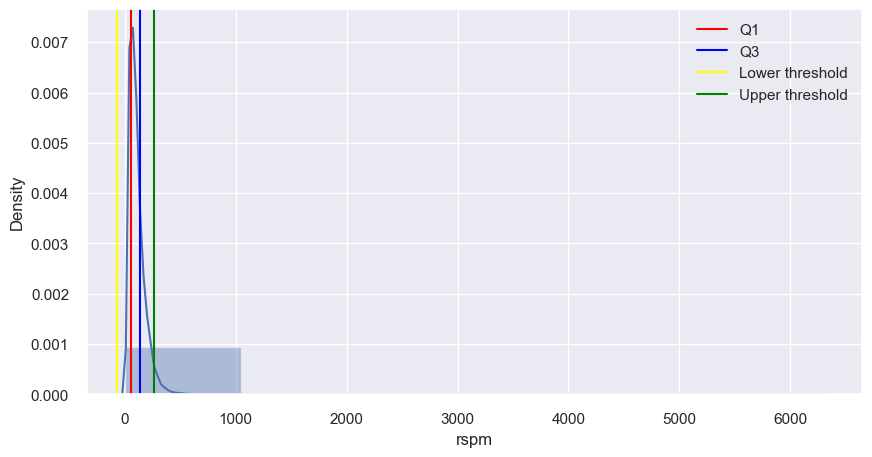

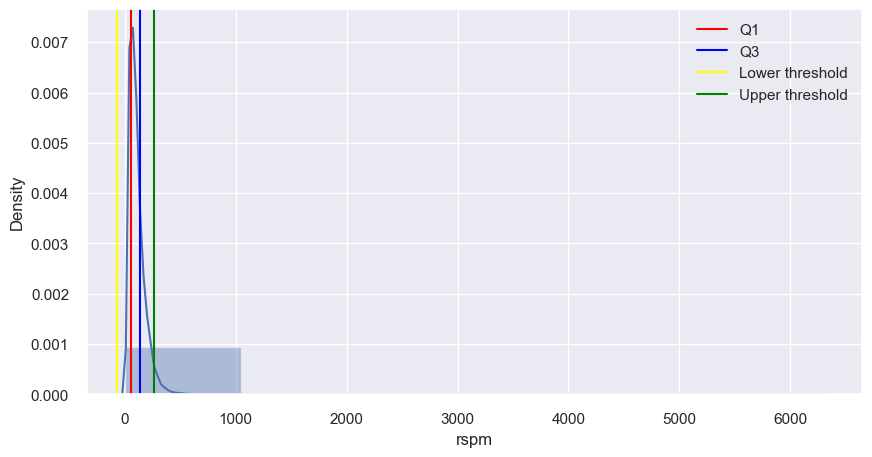

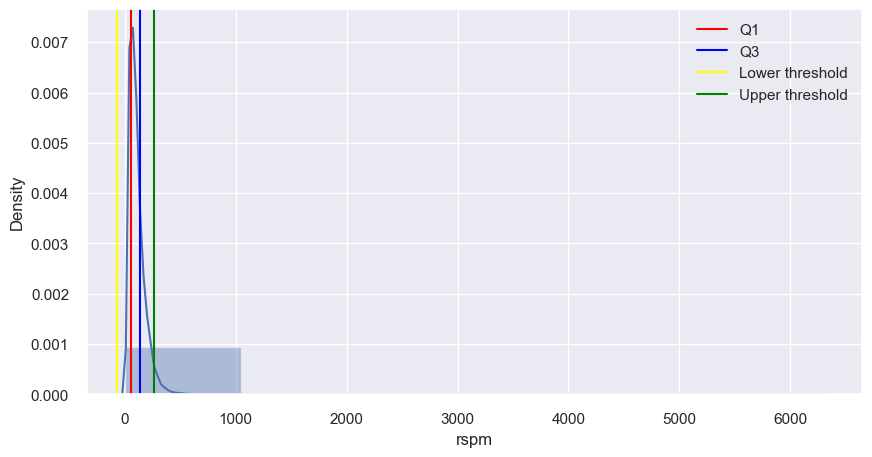

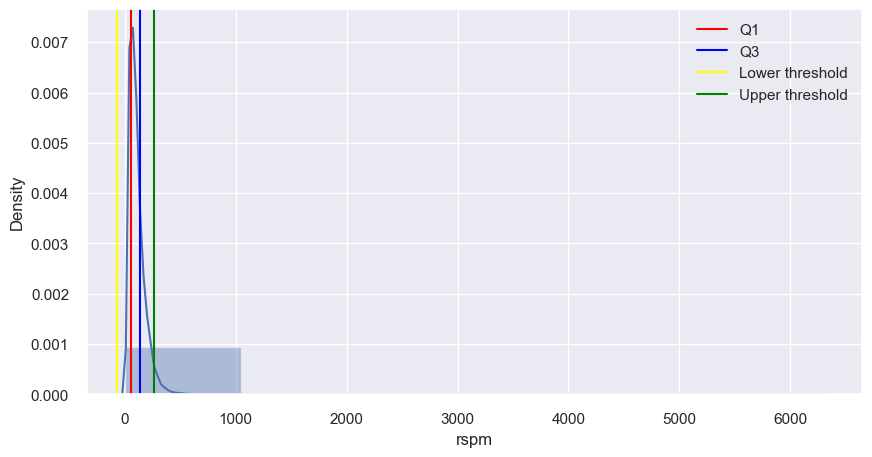

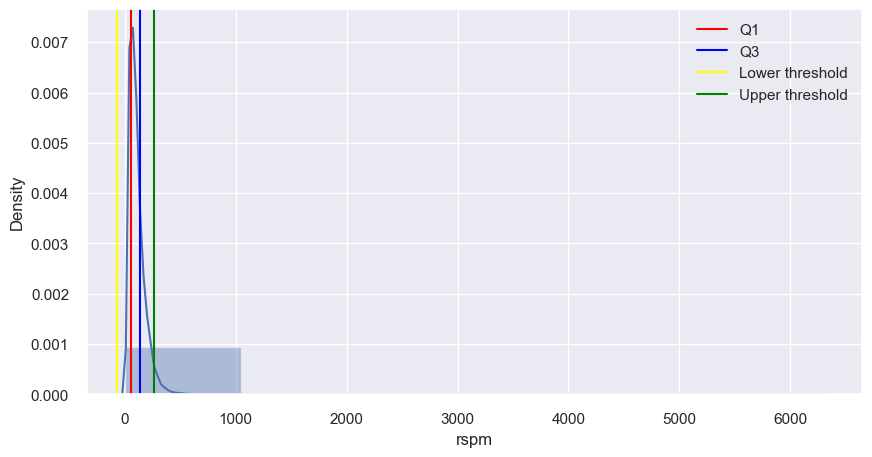

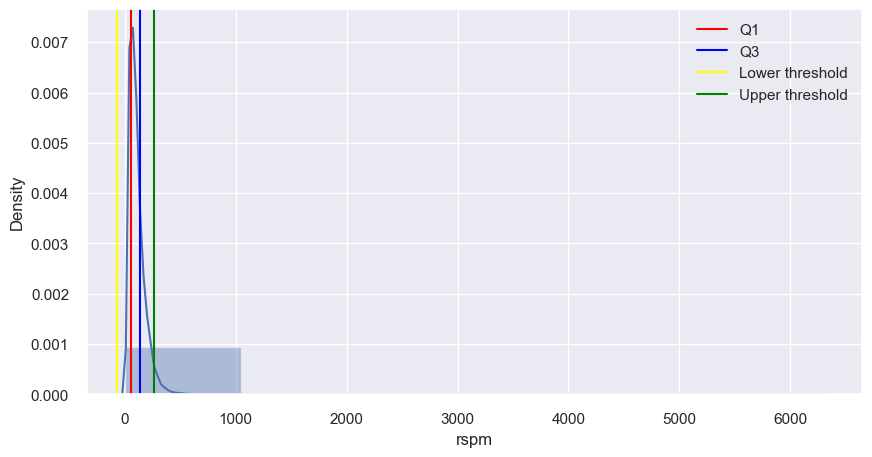

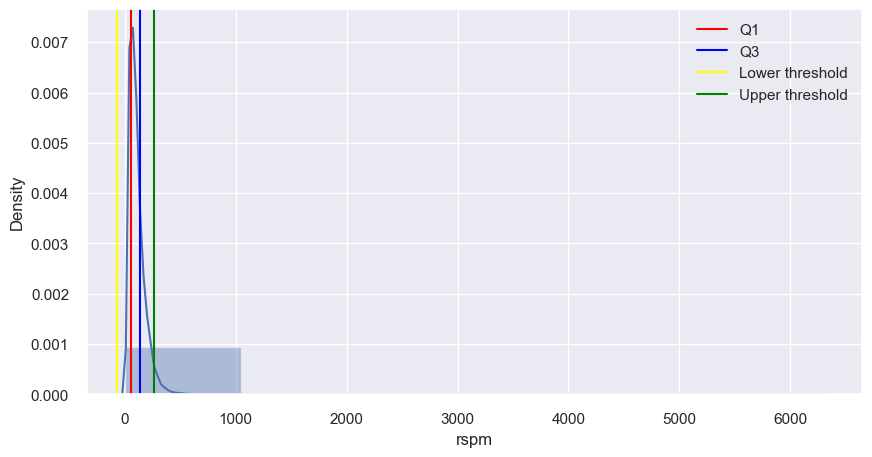

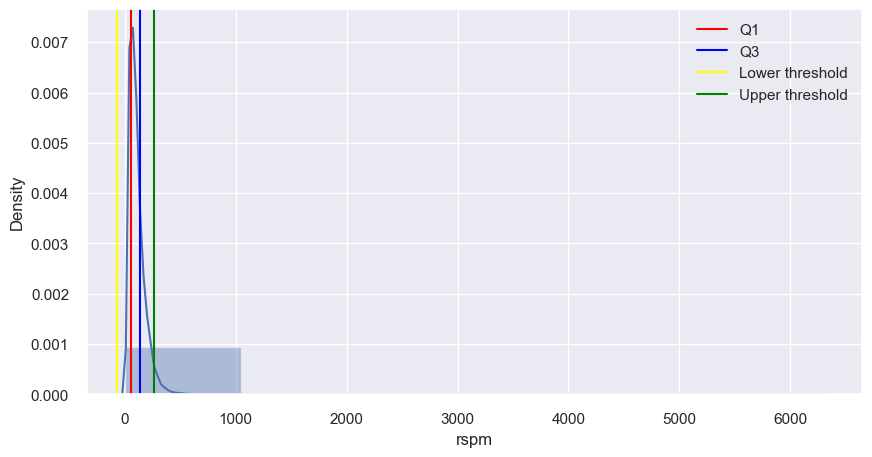

In [146]:
for i in data.columns:
    f, (ax1) = plt.subplots(1,1,figsize=(10,5))
    ax1 = get_distplot('rspm')

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)
C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_1052\1831770687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[col], bins = 6)
C:\U

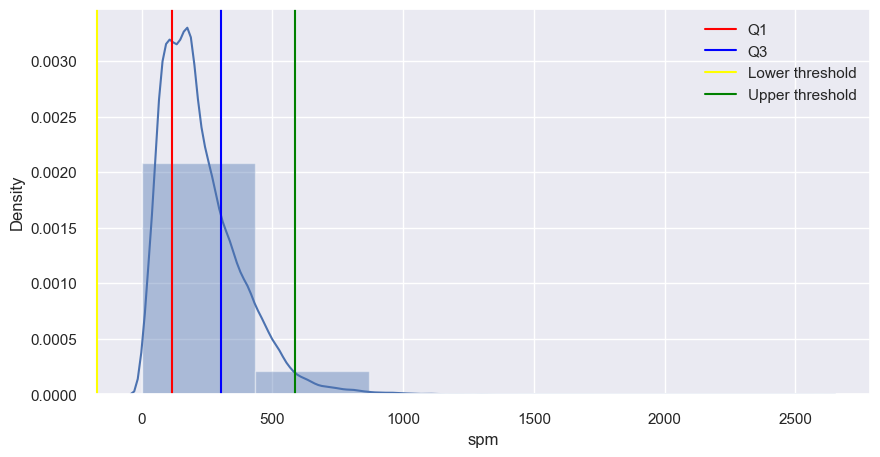

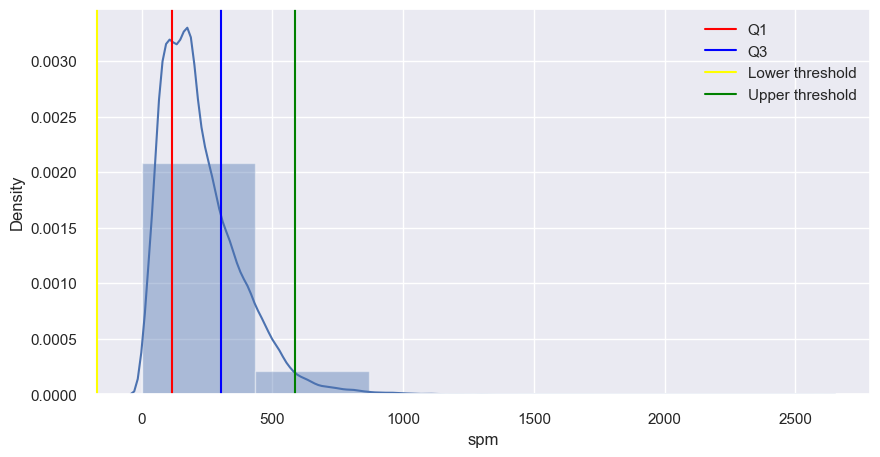

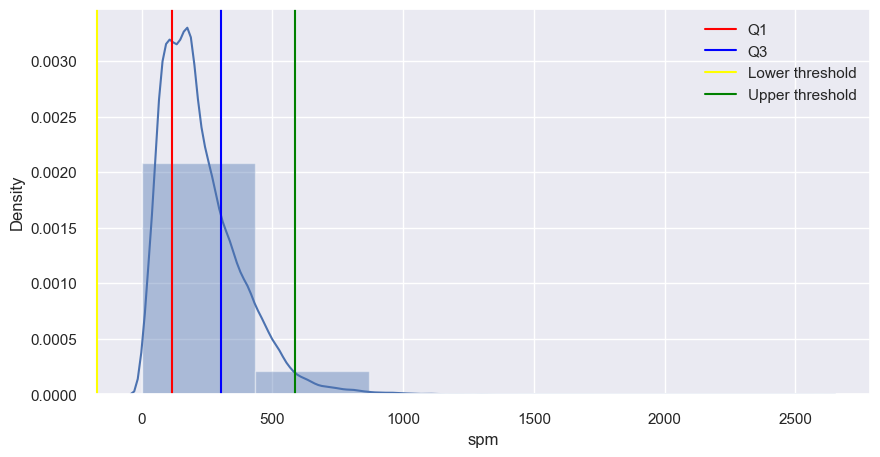

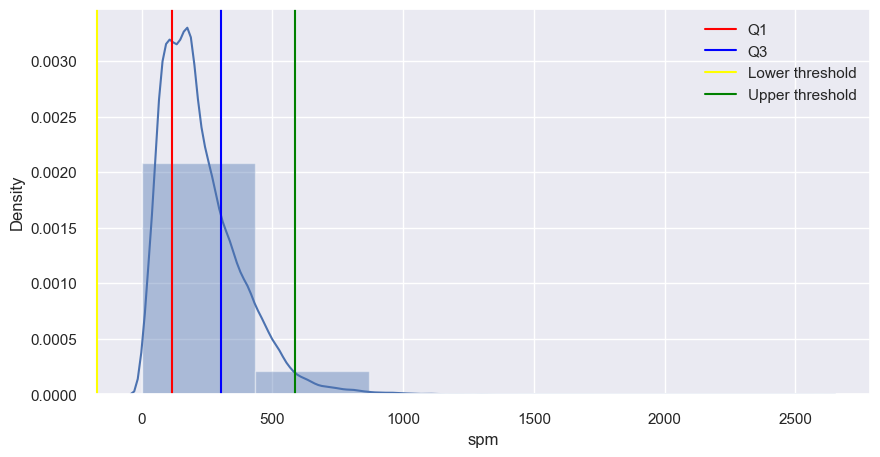

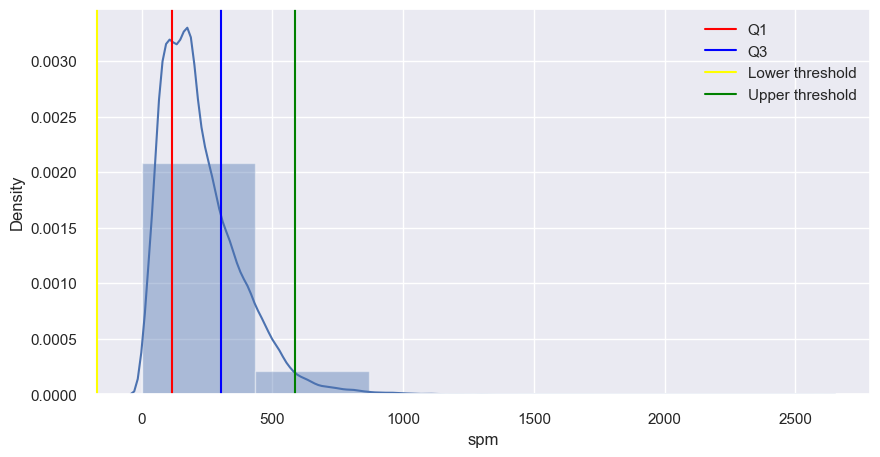

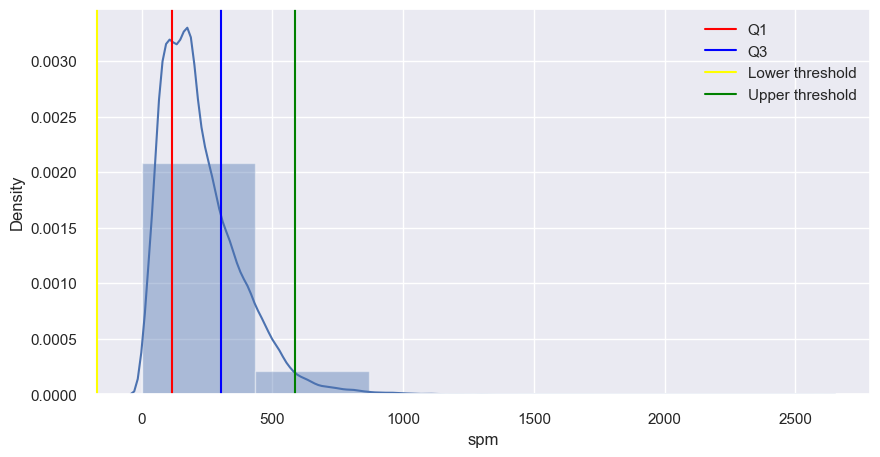

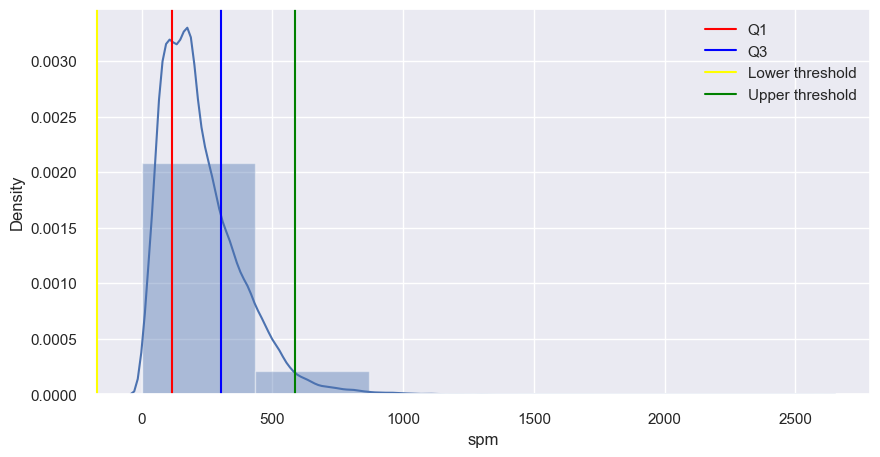

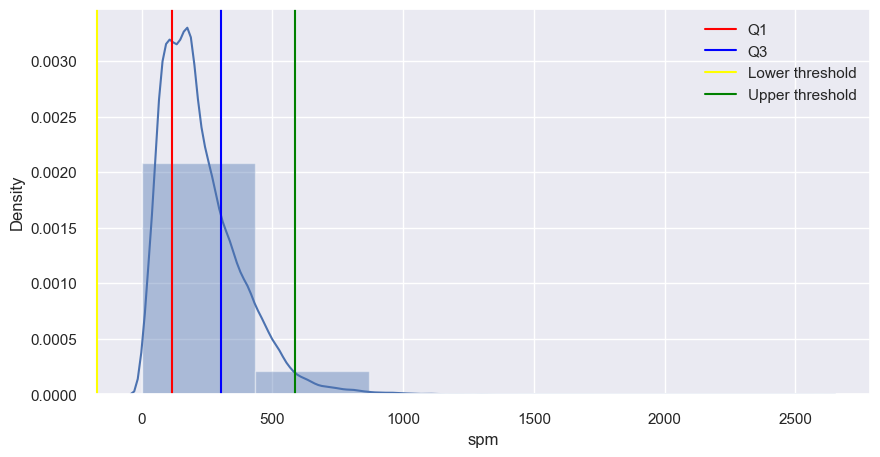

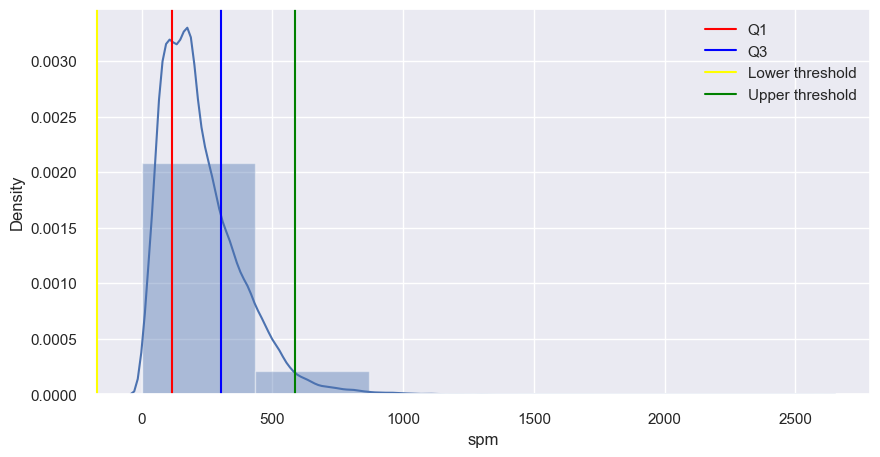

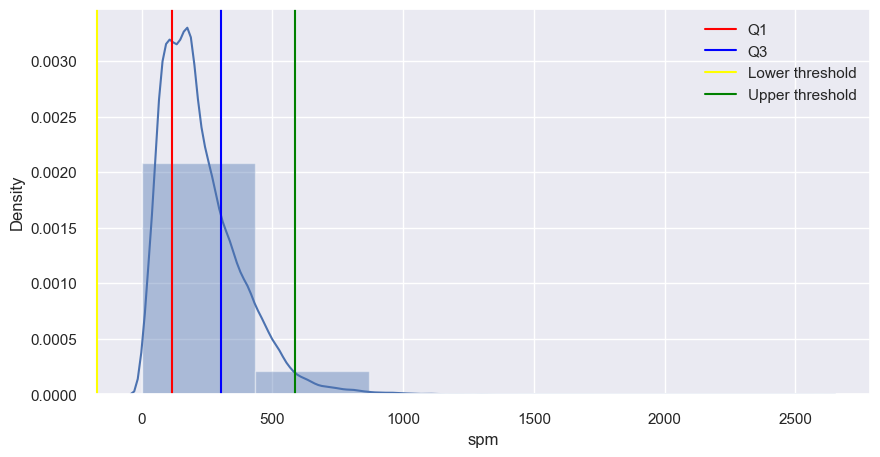

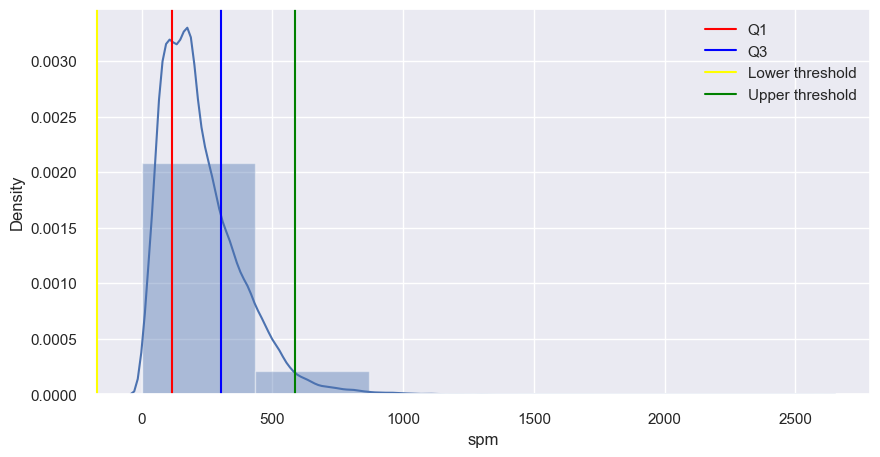

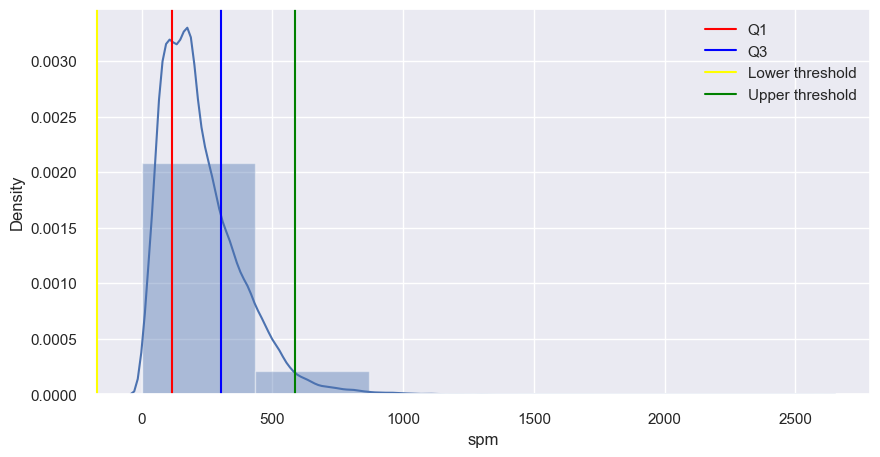

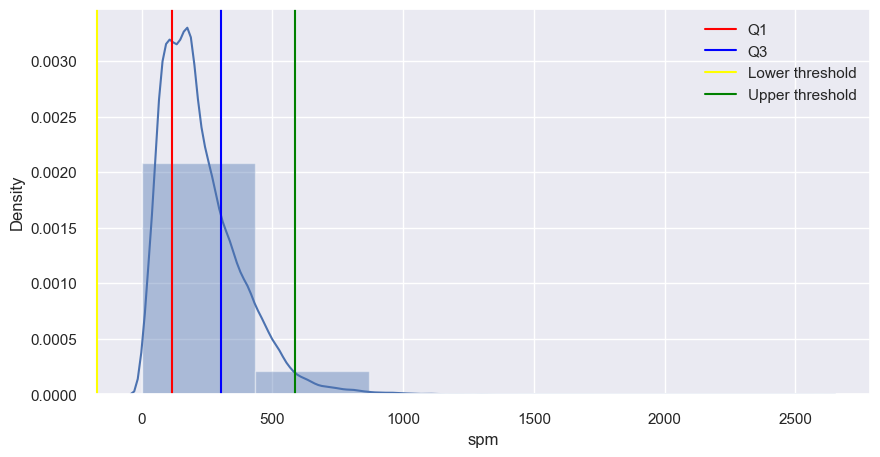

In [147]:
for i in data.columns:
    f, (ax1) = plt.subplots(1,1,figsize=(10,5))
    ax1 = get_distplot('spm')

In [157]:
#Further I am going to apply ML models in future